# Problem Statement

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc.
You have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset. 

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [3]:
# Loading the dataset
df=pd.read_csv("G:\shipra\Fliprobo internship/loan_prediction.csv")

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Exploratory Data Analysis (EDA):

In [5]:
# checking the column names
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
# checking the shape of datatset
df.shape

(614, 13)

There are 614 rows and 13 columns in the dataset.

The target column is "Loan_Status"

Feature Columns:
Loan id:

In [11]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [12]:
# Checking for numerical and categorical features.

nf = df.select_dtypes(include=[np.number]).columns
cf = df.select_dtypes(include=[np.object]).columns

print('Numerical features in the dataset are:\n',nf,'\n','-'*70,'\n Categorical features in the dataset are:\n',cf)

Numerical features in the dataset are:
 Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object') 
 ---------------------------------------------------------------------- 
 Categorical features in the dataset are:
 Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [7]:
# checking for missing values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
df.isnull().sum().sum()

149

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Observations:
1. There are total 149 null values present in the dataset.
2. There are 4 columns of float datatypes.
3. There is 1 column of  integer datatype.
4. There are 8 columns of object datatypes.

# Replacing the Null Values and Zero's

In [15]:
import sklearn
from sklearn.impute import SimpleImputer

In [16]:
#Categorical columns have null value presence , will replace it by mode of the respective columns 
l=['Gender','Married','Dependents','Self_Employed']
for i in l:
    df[i]=SimpleImputer(missing_values=np.nan,strategy='most_frequent').fit_transform(df[i].values.reshape(-1,1))

In [17]:
# Numeric columns have null value presence, will replace it by median of the respective columns 
l=['LoanAmount','Loan_Amount_Term','Credit_History']
for i in l:
    df[i]=SimpleImputer(missing_values=np.nan,strategy='median').fit_transform(df[i].values.reshape(-1,1))

In [18]:
df.isnull().sum().sum()

0

The null values whihc was present earlier has been removed

In [19]:
#this column has lots of zero's presence, will replace it by it's mean
df['CoapplicantIncome']=df['CoapplicantIncome'].replace(0,df['CoapplicantIncome'].mean())

# Data Visualization

# 1. Countplot

The countplot for the attribute Gender is-
 AxesSubplot(0.125,0.125;0.775x0.755)


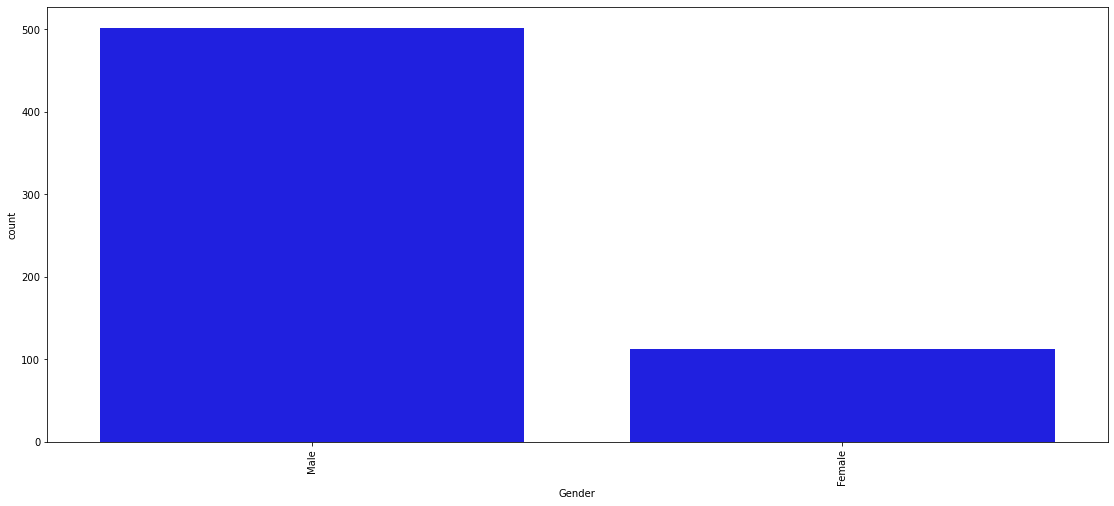



The countplot for the attribute Married is-
 AxesSubplot(0.125,0.125;0.775x0.755)


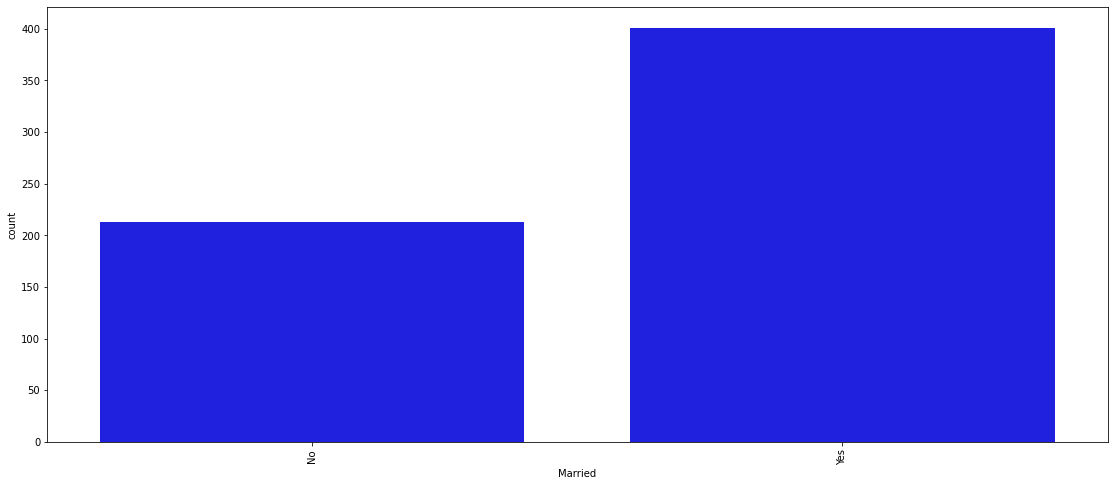



The countplot for the attribute Dependents is-
 AxesSubplot(0.125,0.125;0.775x0.755)


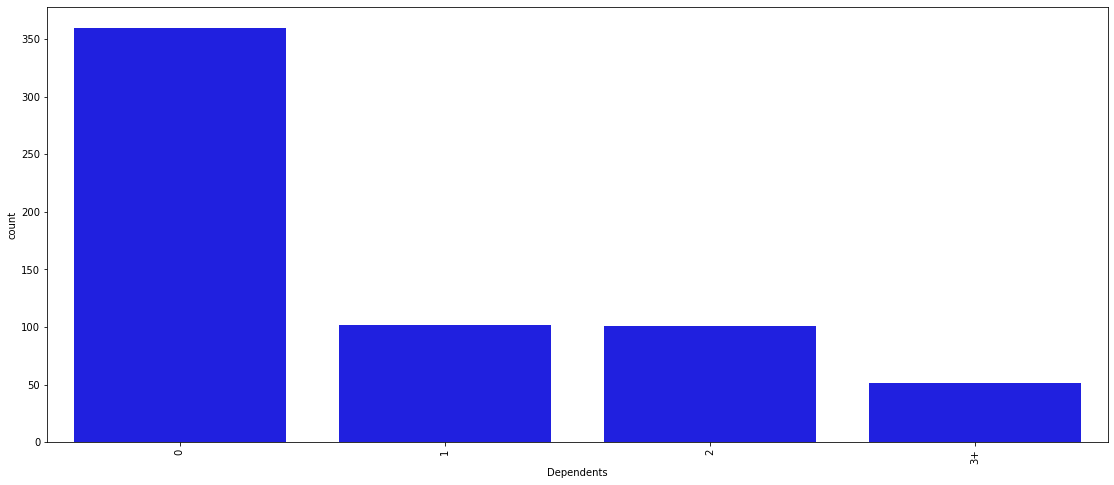



The countplot for the attribute Education is-
 AxesSubplot(0.125,0.125;0.775x0.755)


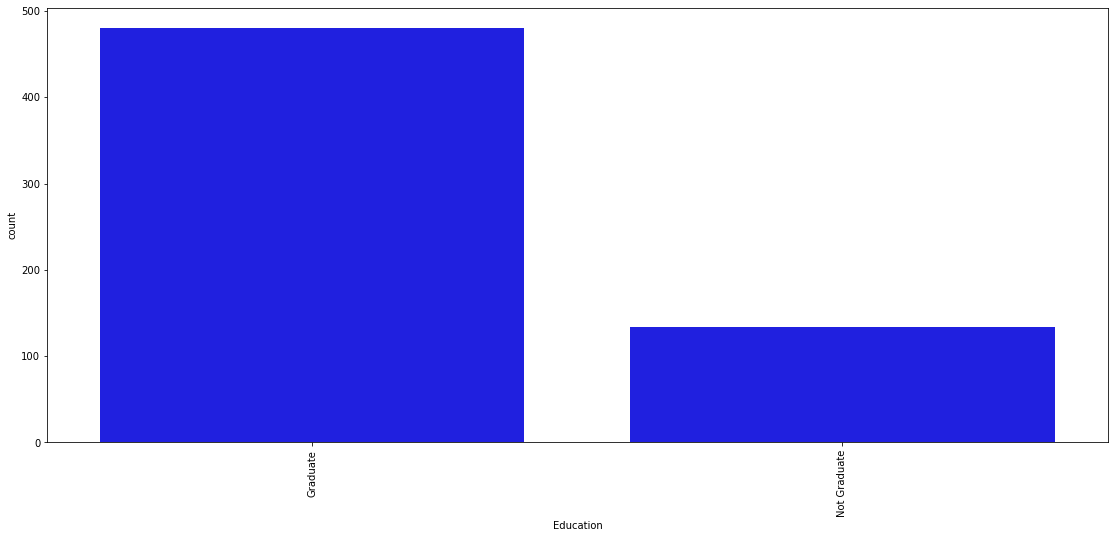



The countplot for the attribute Self_Employed is-
 AxesSubplot(0.125,0.125;0.775x0.755)


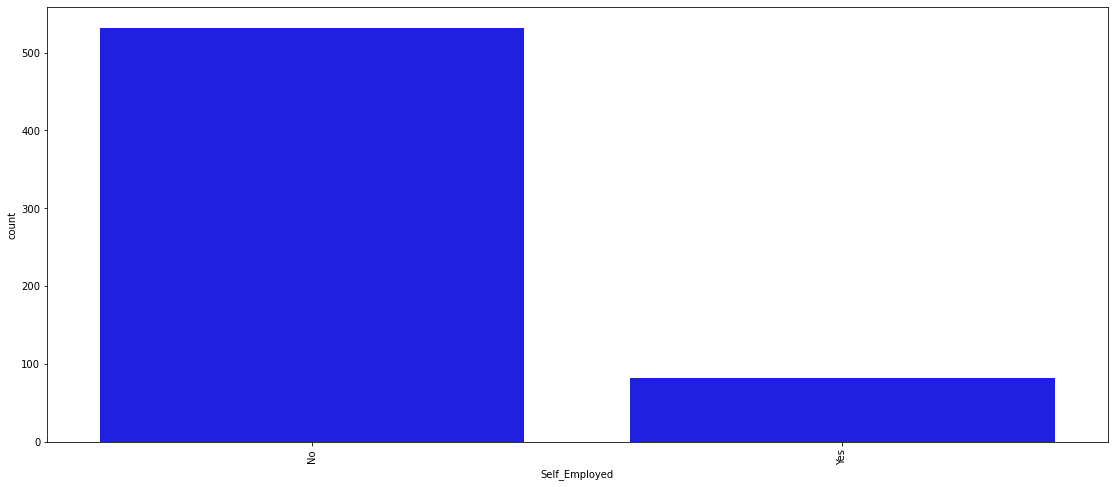



The countplot for the attribute Loan_Amount_Term is-
 AxesSubplot(0.125,0.125;0.775x0.755)


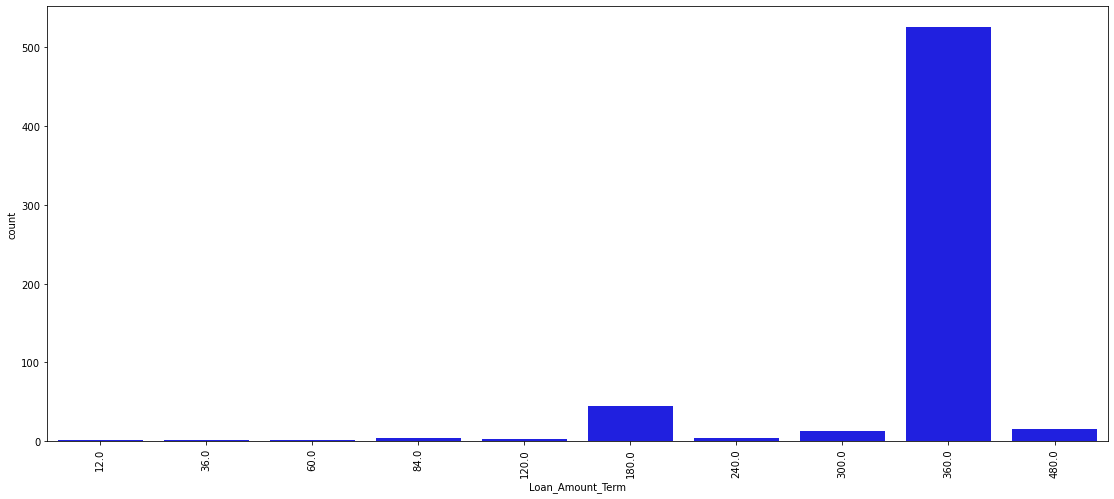



The countplot for the attribute Credit_History is-
 AxesSubplot(0.125,0.125;0.775x0.755)


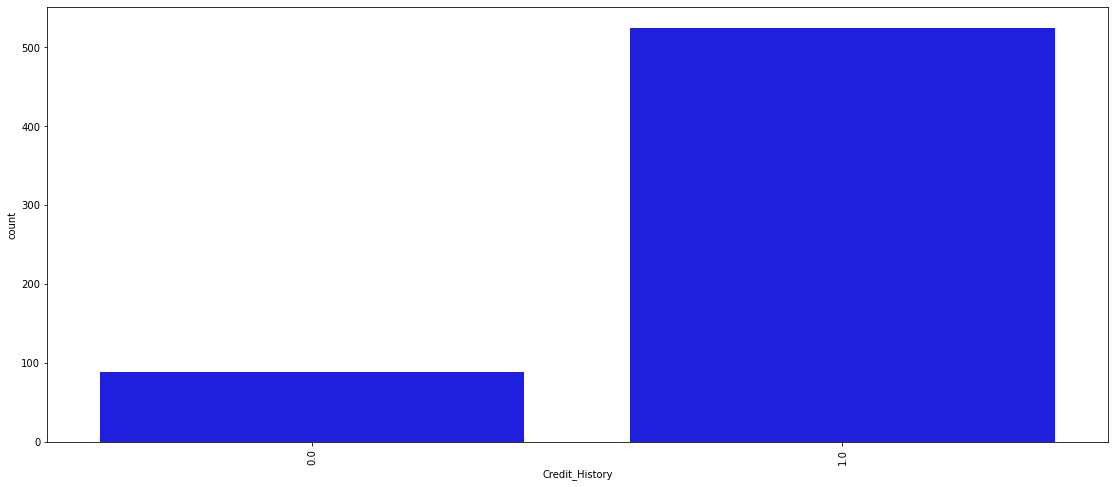



The countplot for the attribute Property_Area is-
 AxesSubplot(0.125,0.125;0.775x0.755)


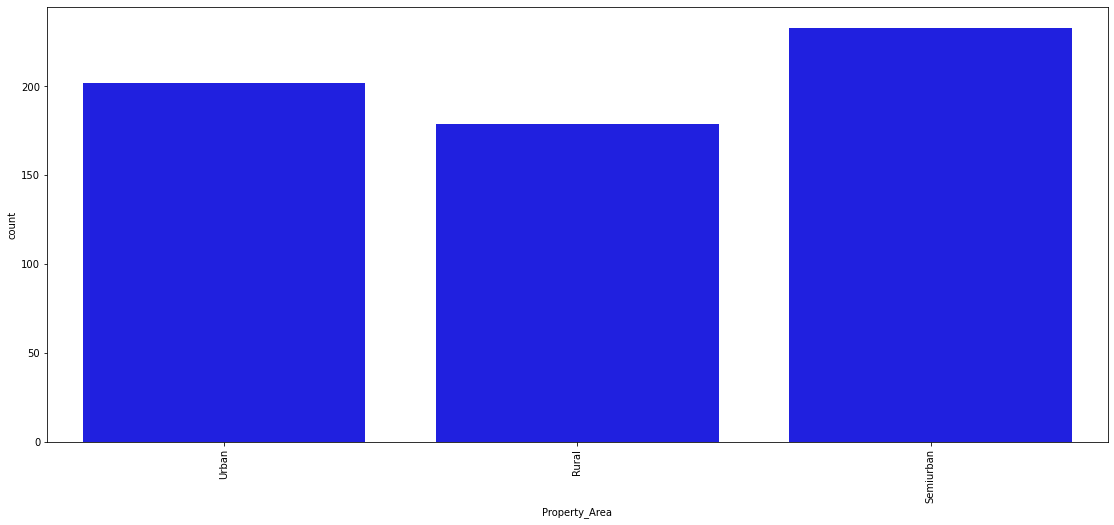



The countplot for the attribute Loan_Status is-
 AxesSubplot(0.125,0.125;0.775x0.755)


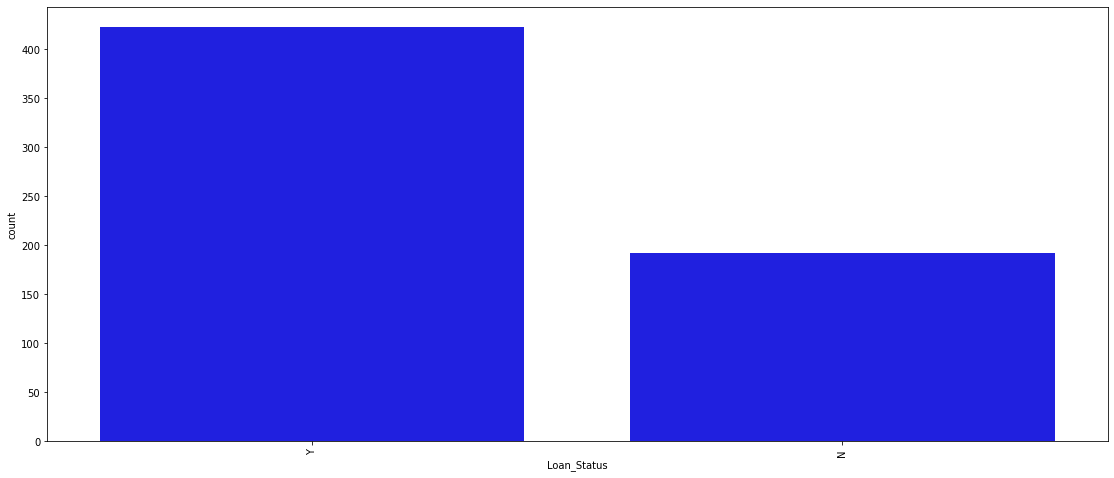

In [20]:
for i in df.columns.drop(['Loan_ID','ApplicantIncome','CoapplicantIncome','LoanAmount']):
    plt.figure(figsize=(19,8))
    print(f'The countplot for the attribute {i} is-\n {sns.countplot(df[i],color="BLUE")}')
    plt.xticks(rotation=90)
    plt.show()
    print('\n')

1.Out of 614 applicant approx 500 are males.

2.Approx 400 applicants are married.

3.Approx 350 applicants don't have any dependent.

4.Approx 500 applicants are graduate.

5.Out of 614 Approx 100 Applicants are self employed.

6.Approx 500 applicants has taken the loan amount tenure as 360 Months

7.More than 400 applicants has atleast taken one loan earlier

8.Approx 250 applicants belongs to semi-urban area.

9.Approx 450 applicants are approved for loan

# 2.Histogram

The Histogram Plot for the attribute Gender is-
 AxesSubplot(0.125,0.125;0.775x0.755)


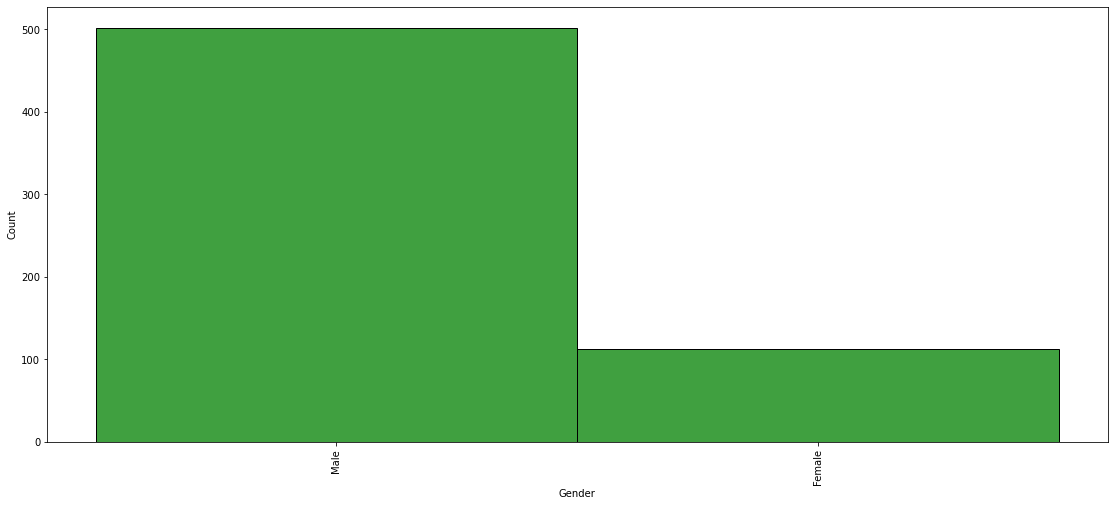



The Histogram Plot for the attribute Married is-
 AxesSubplot(0.125,0.125;0.775x0.755)


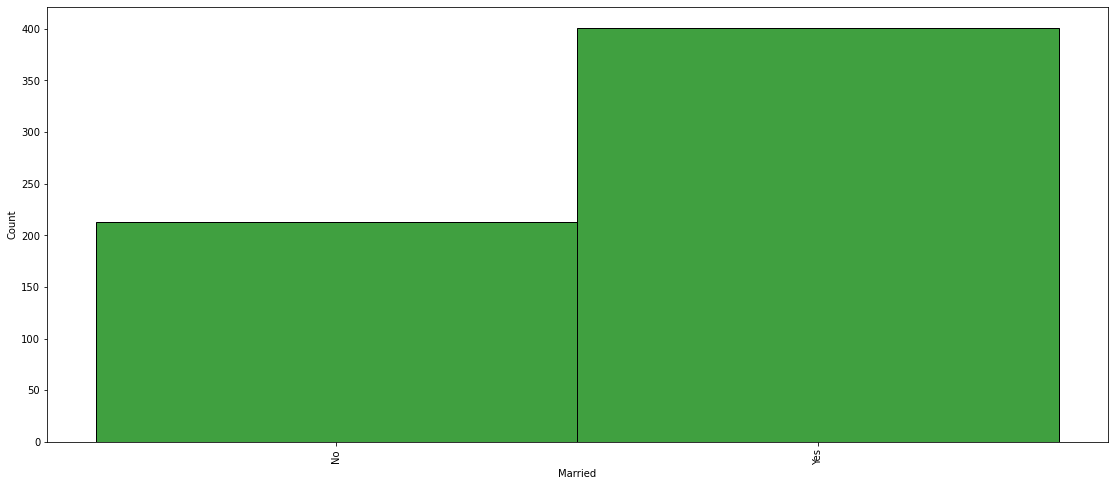



The Histogram Plot for the attribute Dependents is-
 AxesSubplot(0.125,0.125;0.775x0.755)


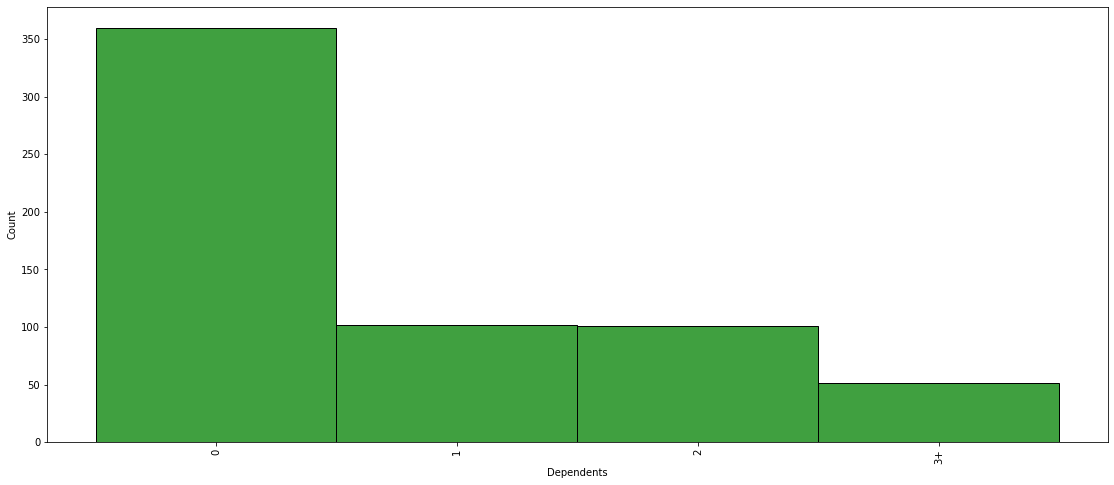



The Histogram Plot for the attribute Education is-
 AxesSubplot(0.125,0.125;0.775x0.755)


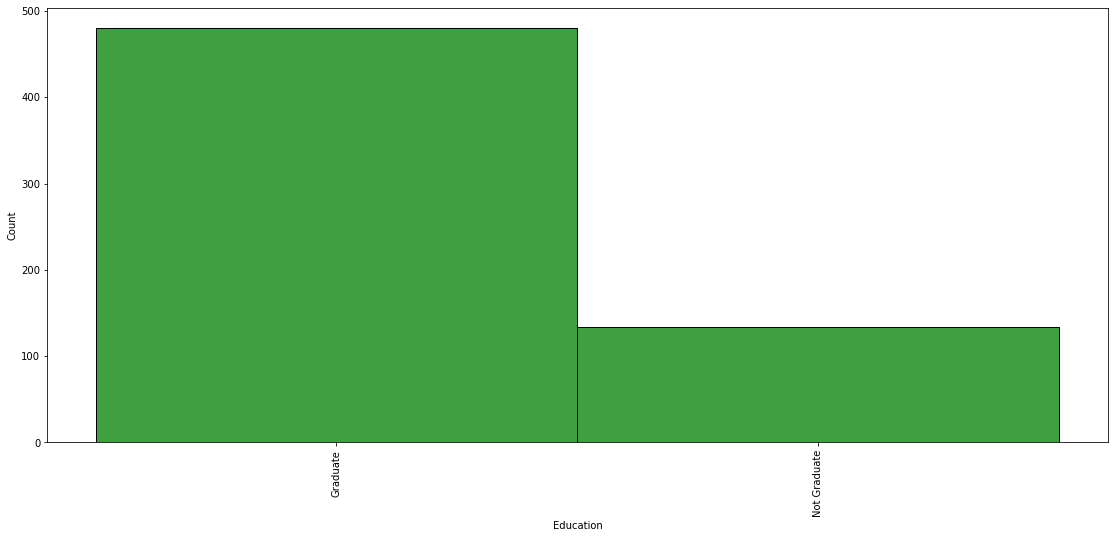



The Histogram Plot for the attribute Self_Employed is-
 AxesSubplot(0.125,0.125;0.775x0.755)


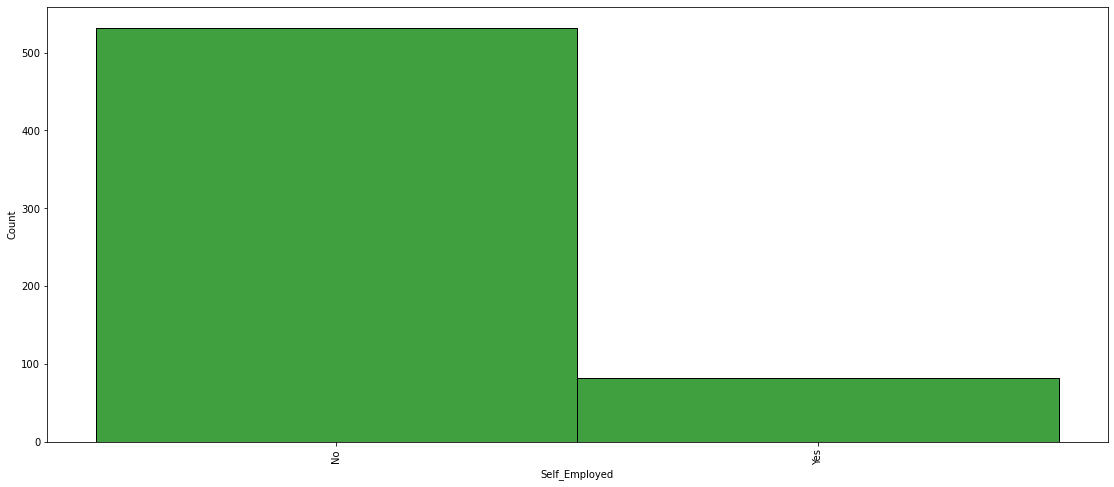



The Histogram Plot for the attribute Loan_Amount_Term is-
 AxesSubplot(0.125,0.125;0.775x0.755)


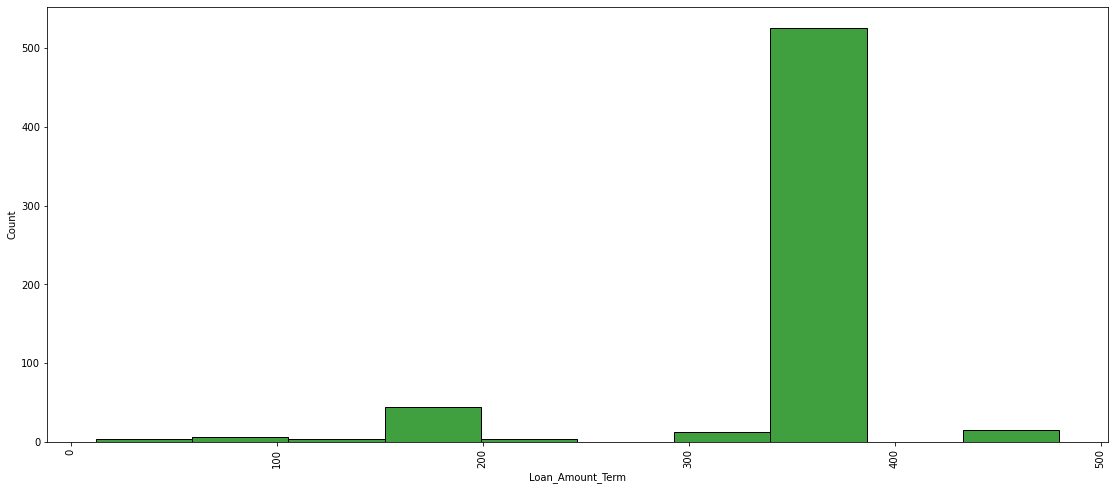



The Histogram Plot for the attribute Credit_History is-
 AxesSubplot(0.125,0.125;0.775x0.755)


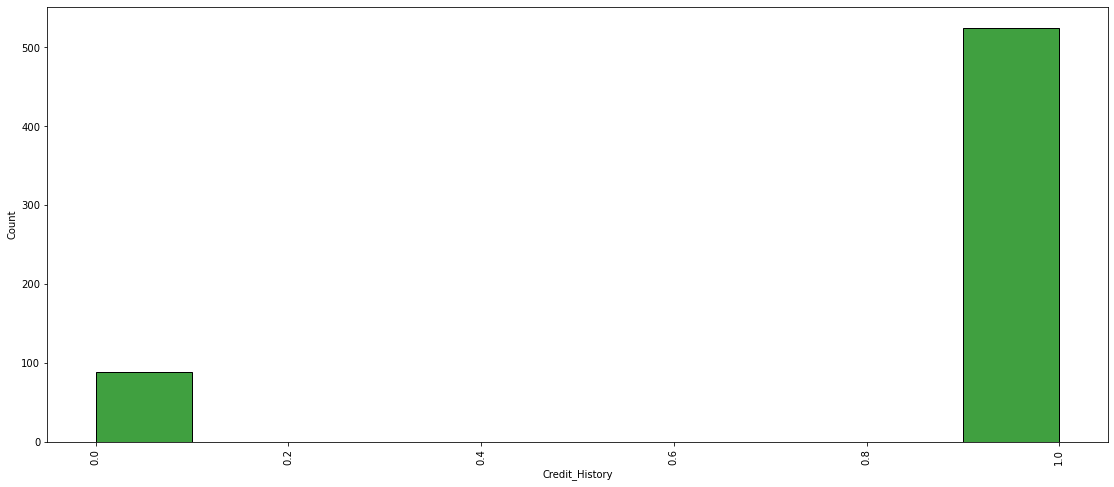



The Histogram Plot for the attribute Property_Area is-
 AxesSubplot(0.125,0.125;0.775x0.755)


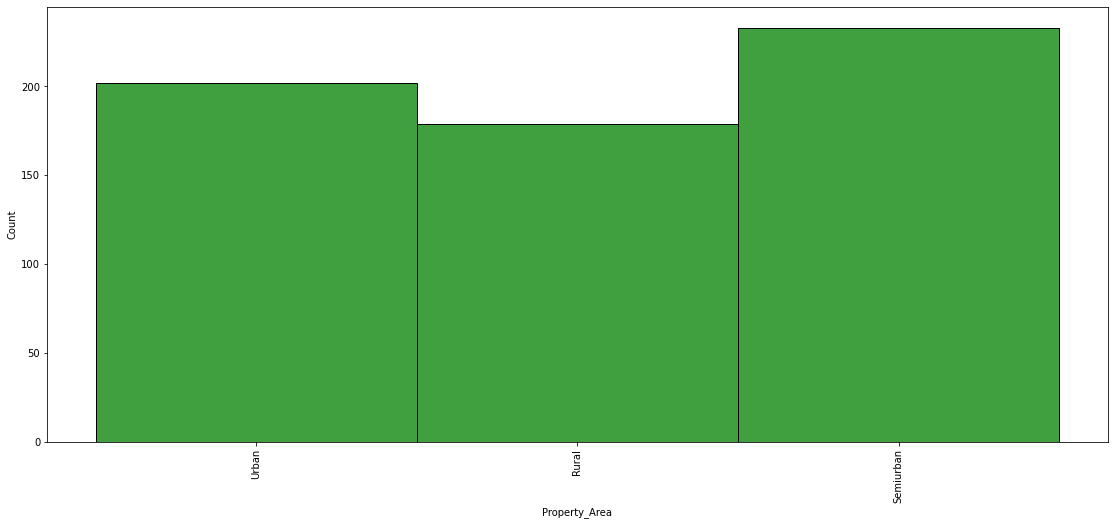



The Histogram Plot for the attribute Loan_Status is-
 AxesSubplot(0.125,0.125;0.775x0.755)


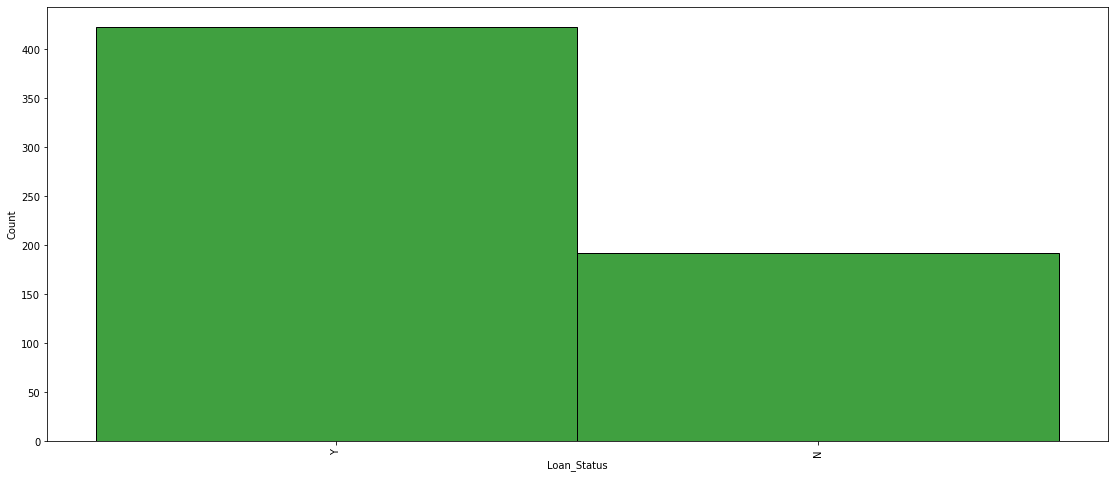

In [21]:
for i in df.columns.drop(['Loan_ID','ApplicantIncome','CoapplicantIncome','LoanAmount']):
    plt.figure(figsize=(19,8))
    print(f'The Histogram Plot for the attribute {i} is-\n {sns.histplot(df[i],color="green",bins=10)}')
    plt.xticks(rotation=90)
    plt.show()
    print('\n')

Observation:
Graduate Male professionals who are working in a company,being married and belongs to the semi-urban area having least dependents in the family has applied for the loan in high numbers and most of the cases are approved for the loan.

# 3.Scatterplot

The Scatter Plot for the attribute "Loan_Status" & "Loan_ID" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


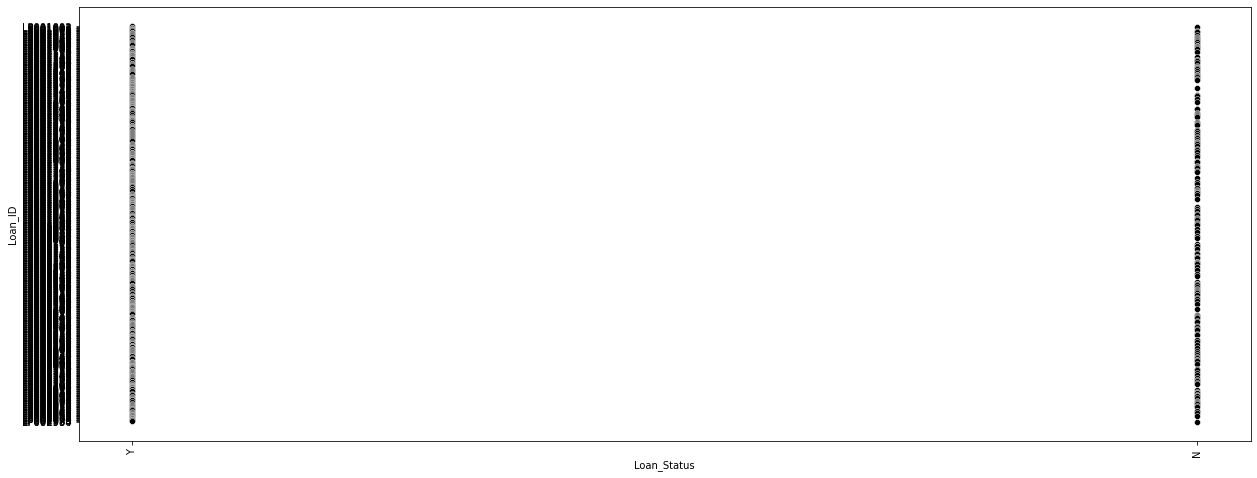



The Scatter Plot for the attribute "Loan_Status" & "Gender" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


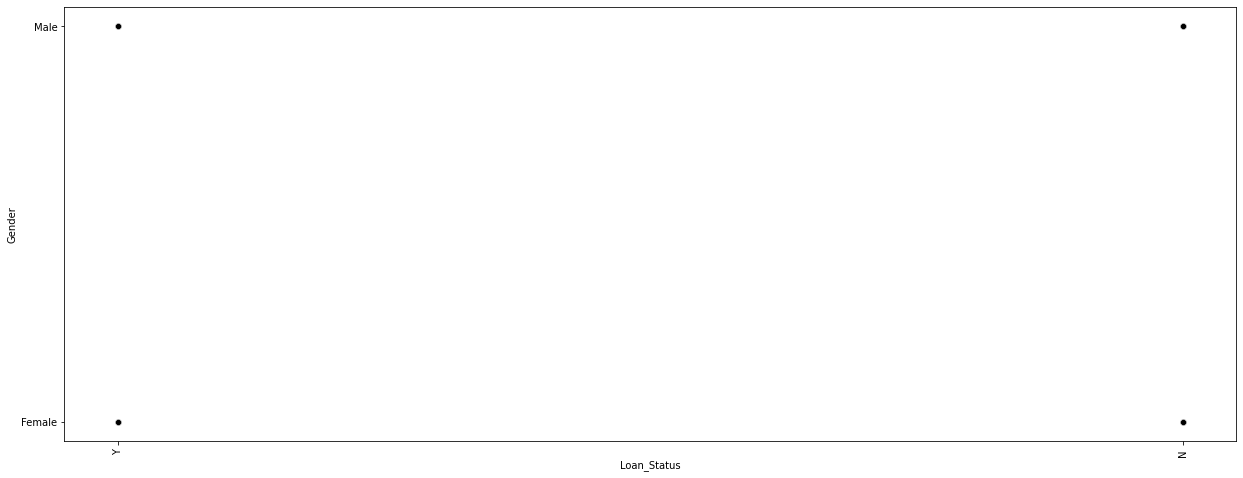



The Scatter Plot for the attribute "Loan_Status" & "Married" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


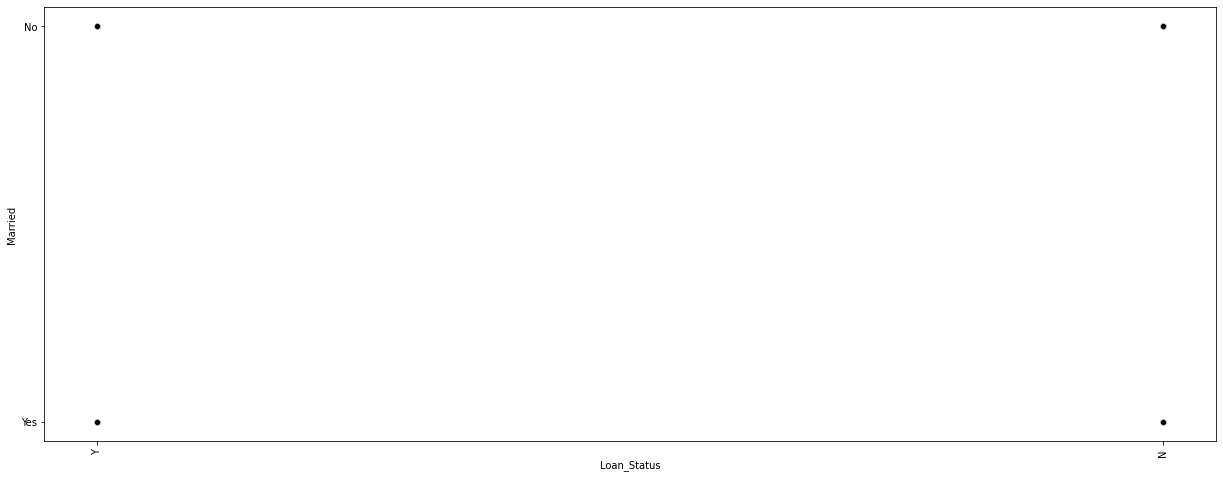



The Scatter Plot for the attribute "Loan_Status" & "Dependents" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


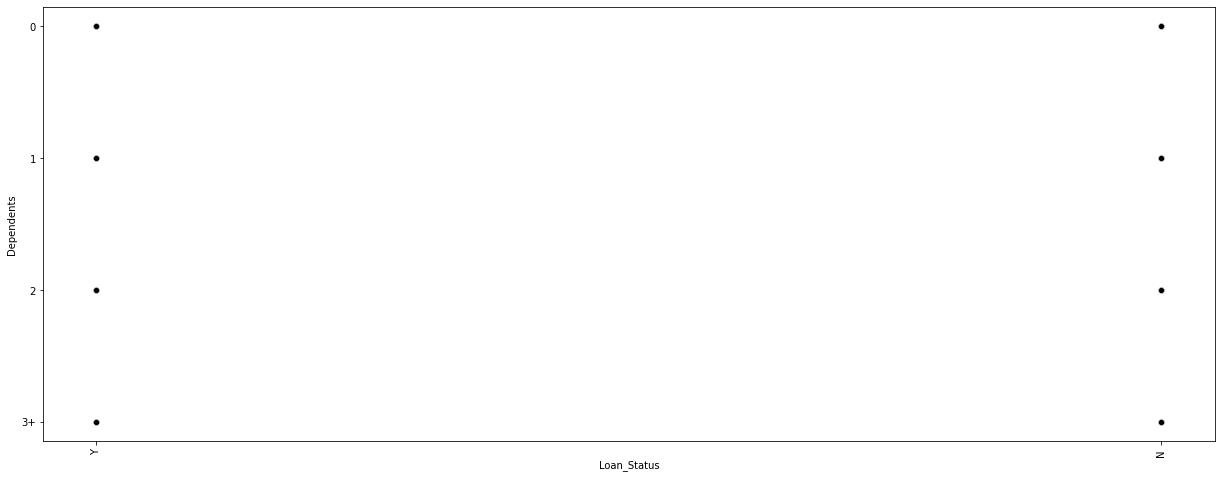



The Scatter Plot for the attribute "Loan_Status" & "Education" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


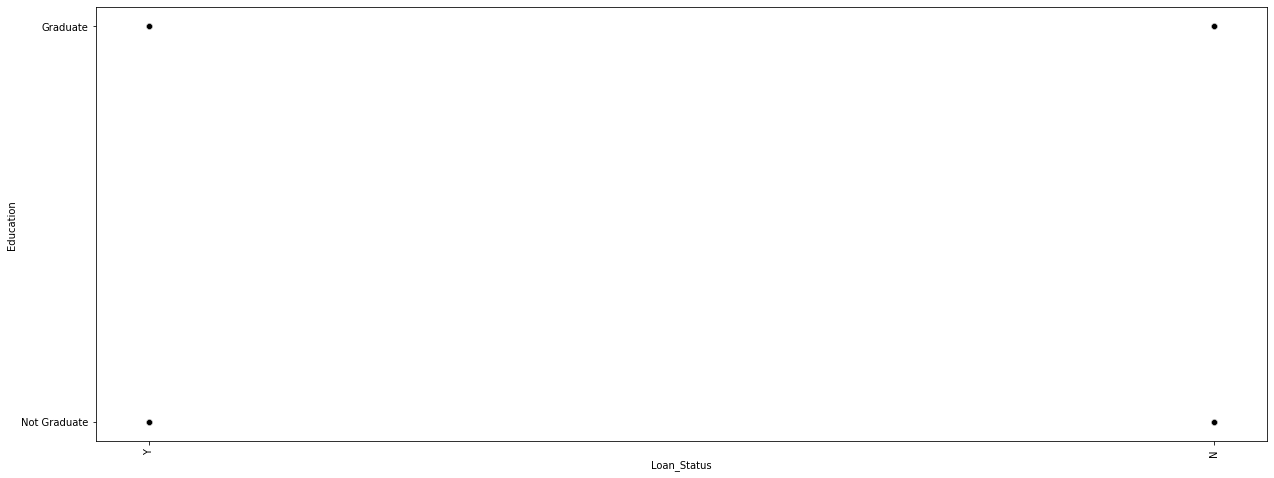



The Scatter Plot for the attribute "Loan_Status" & "Self_Employed" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


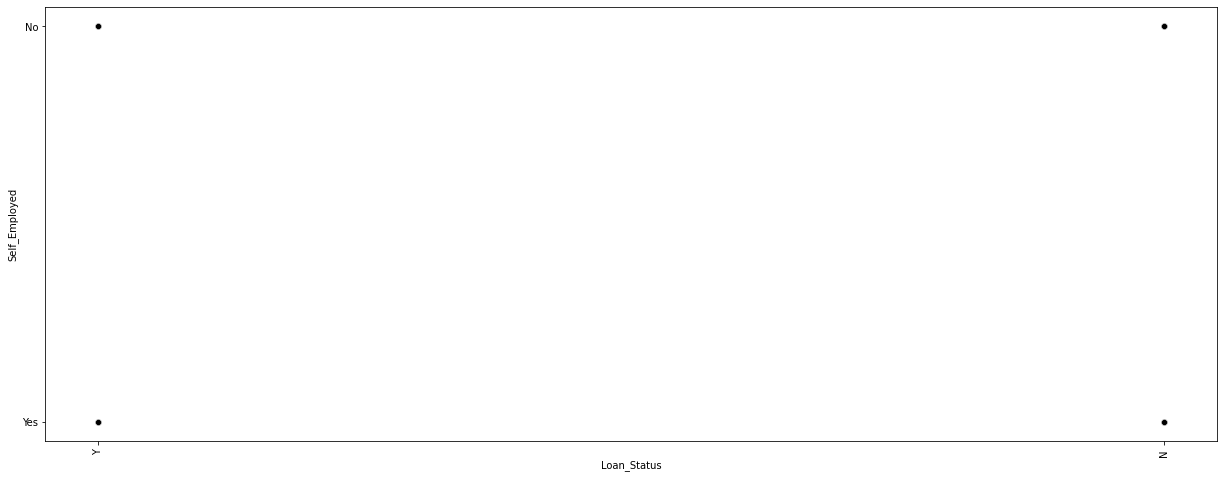



The Scatter Plot for the attribute "Loan_Status" & "ApplicantIncome" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


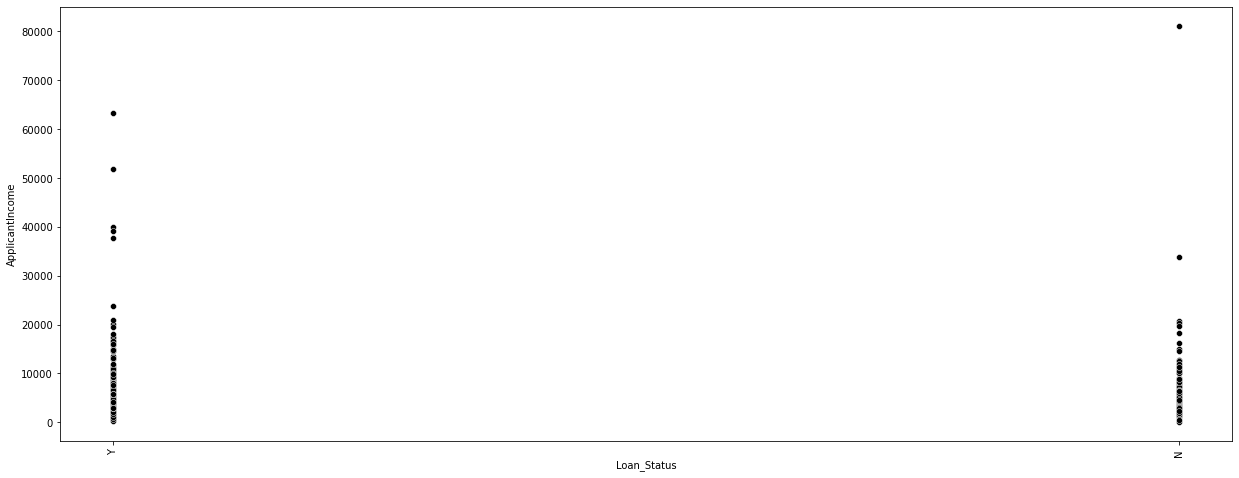



The Scatter Plot for the attribute "Loan_Status" & "CoapplicantIncome" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


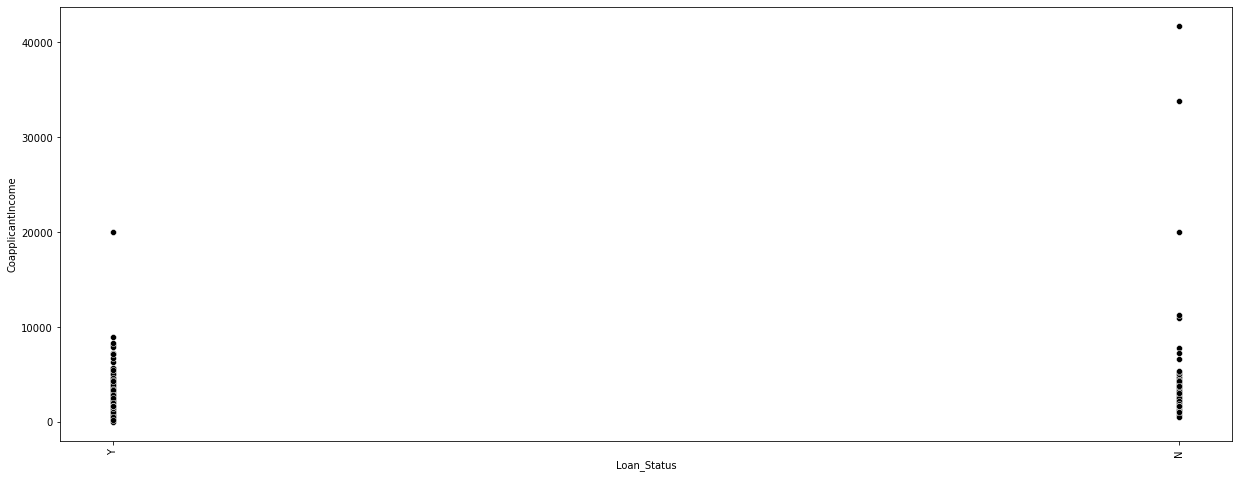



The Scatter Plot for the attribute "Loan_Status" & "LoanAmount" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


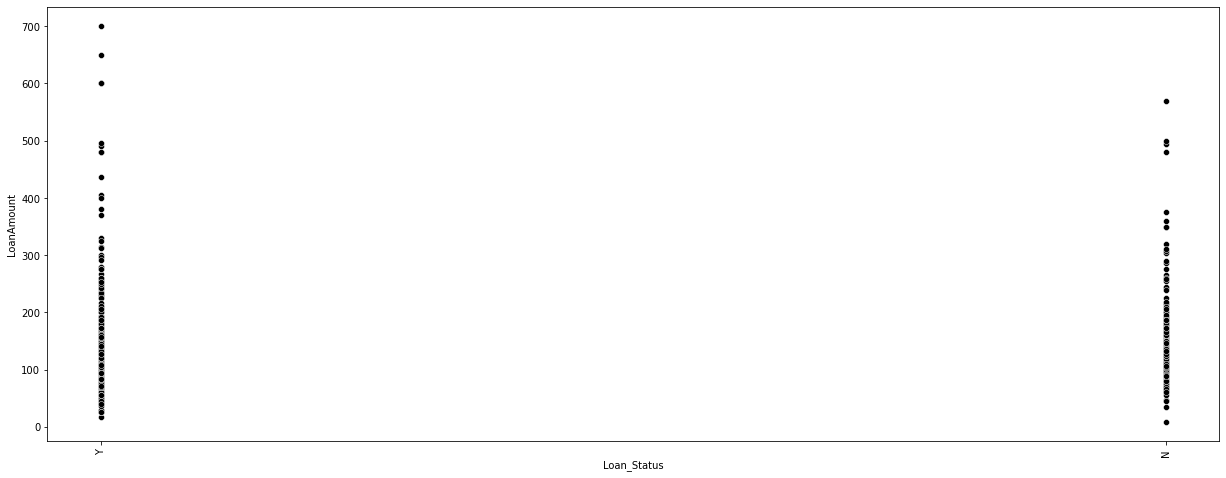



The Scatter Plot for the attribute "Loan_Status" & "Loan_Amount_Term" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


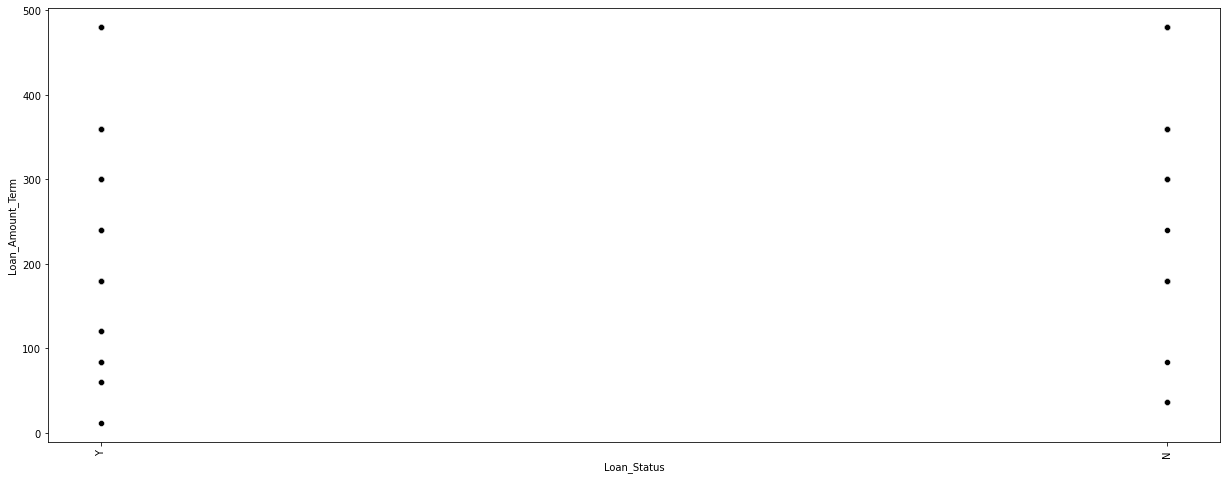



The Scatter Plot for the attribute "Loan_Status" & "Credit_History" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


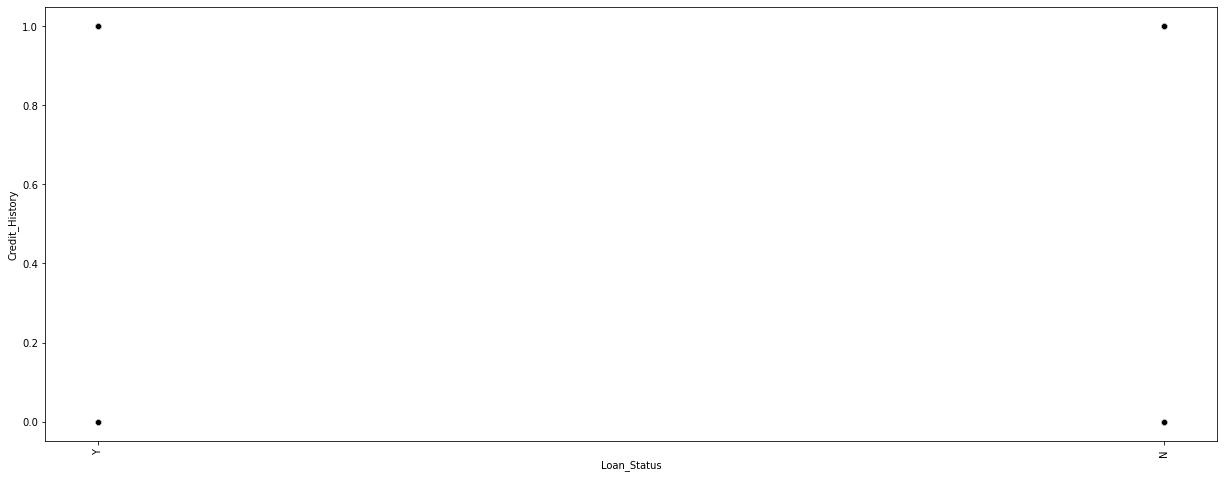



The Scatter Plot for the attribute "Loan_Status" & "Property_Area" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


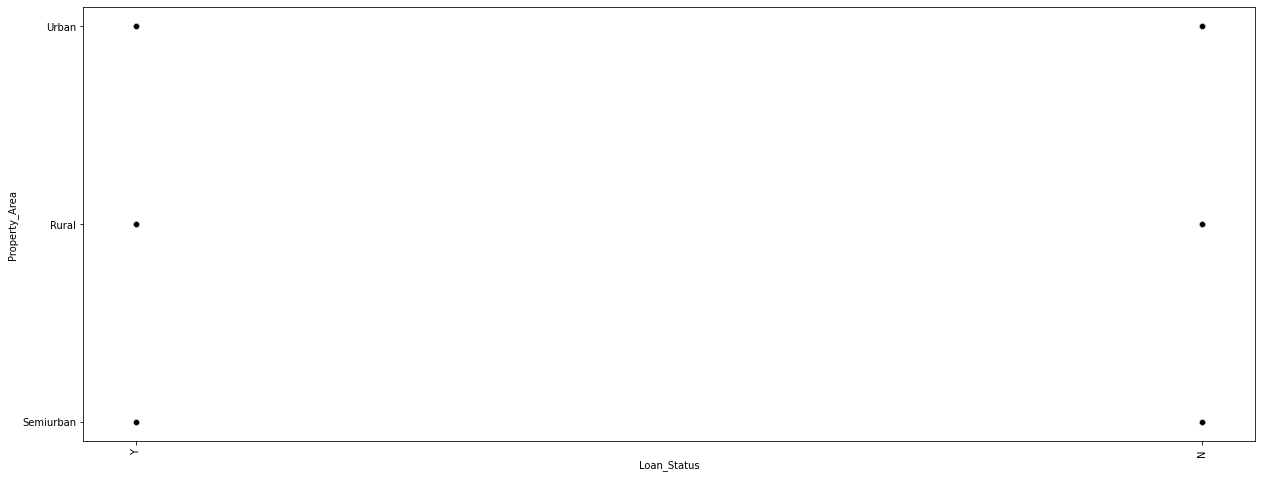



The Scatter Plot for the attribute "Loan_Status" & "Loan_Status" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


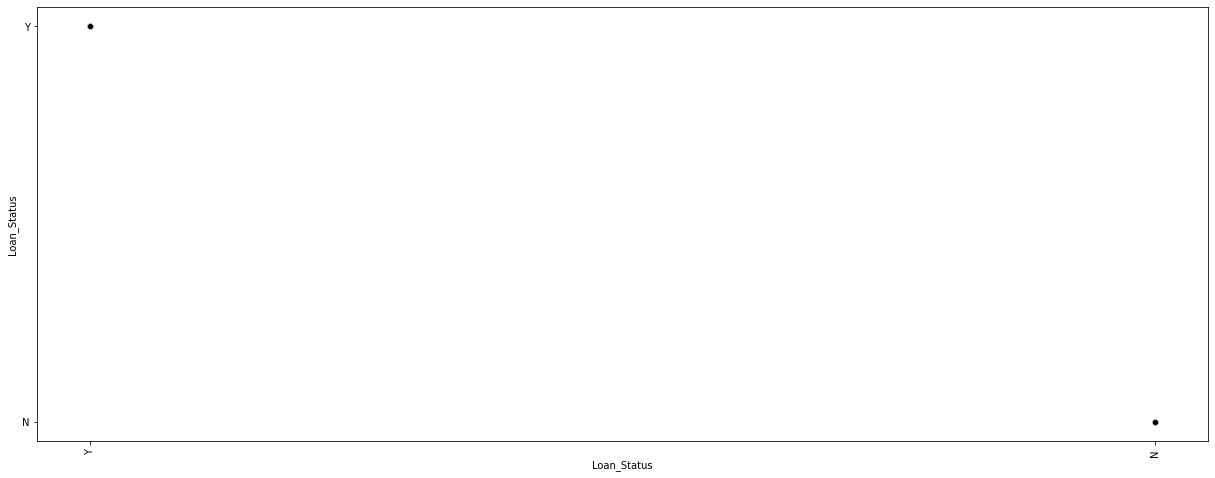

In [22]:
for i in df.columns:
    plt.figure(figsize=(21,8))
    print(f'The Scatter Plot for the attribute "Loan_Status" & "{i}" is-\n {sns.scatterplot(df.Loan_Status,df[i],color="black")}')
    plt.xticks(rotation=90)
    plt.show()
    print('\n')

Above all the graphs are showing the distribution of attributes w.r.t. target variable 'Loan_Status'



# 4.Lineplot

The Line Plot for the attribute "Loan_Status" & "Loan_ID" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


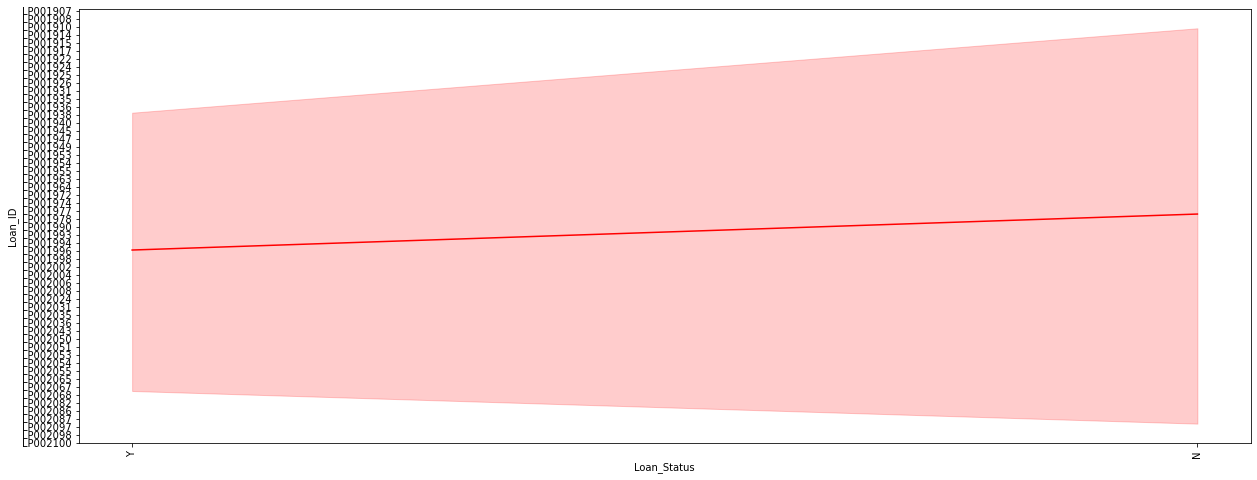



The Line Plot for the attribute "Loan_Status" & "Gender" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


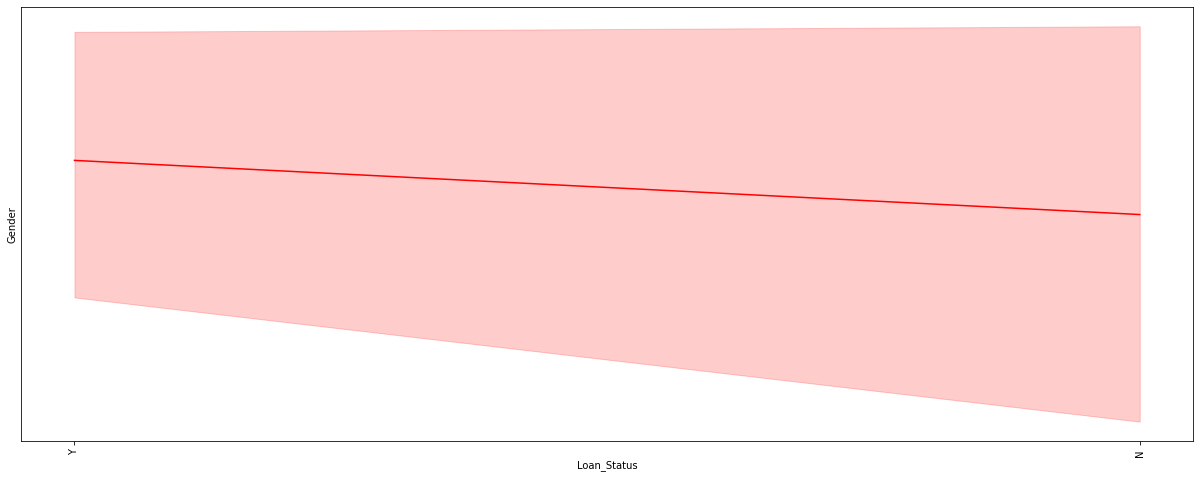



The Line Plot for the attribute "Loan_Status" & "Married" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


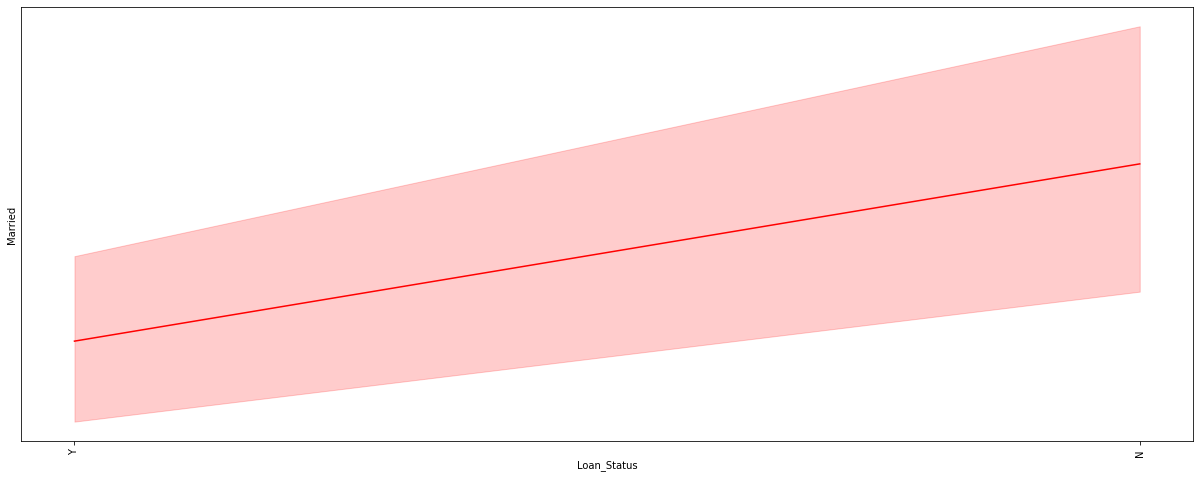



The Line Plot for the attribute "Loan_Status" & "Dependents" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


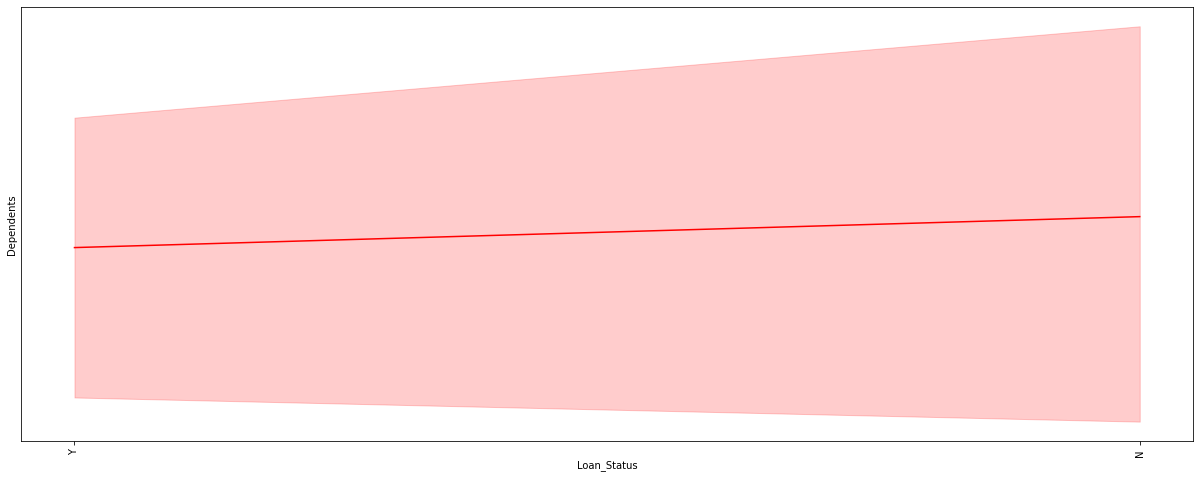



The Line Plot for the attribute "Loan_Status" & "Education" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


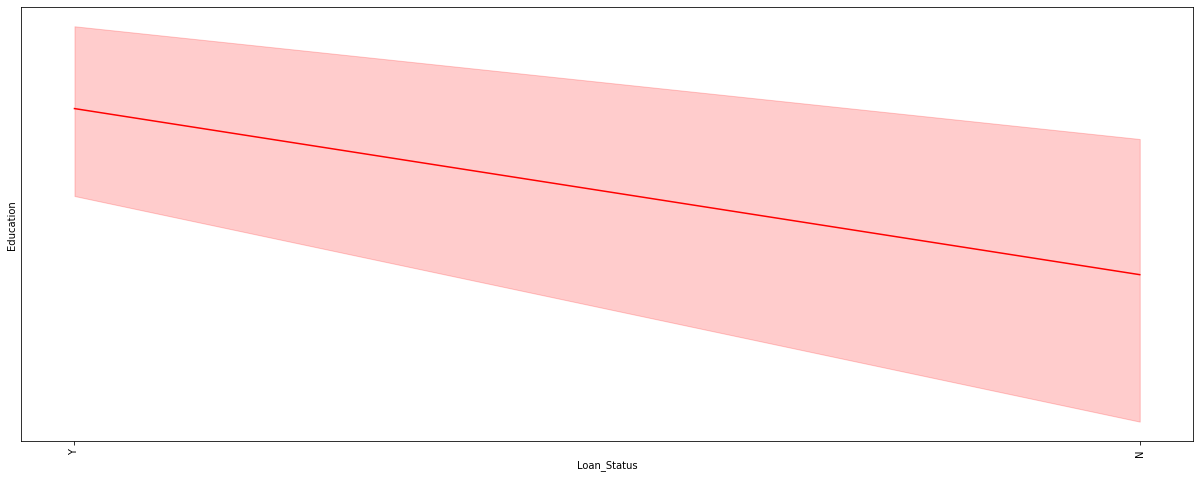



The Line Plot for the attribute "Loan_Status" & "Self_Employed" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


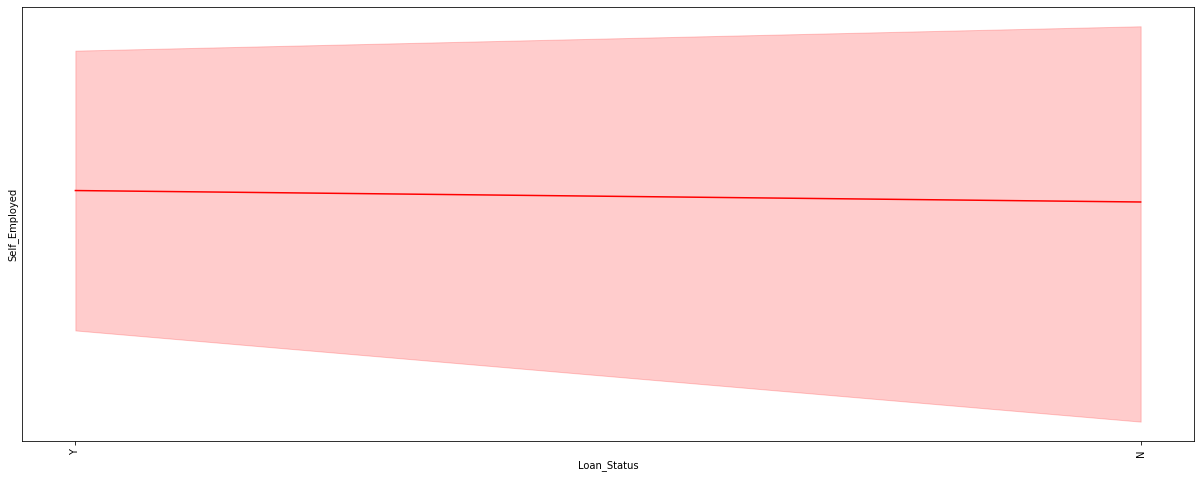



The Line Plot for the attribute "Loan_Status" & "ApplicantIncome" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


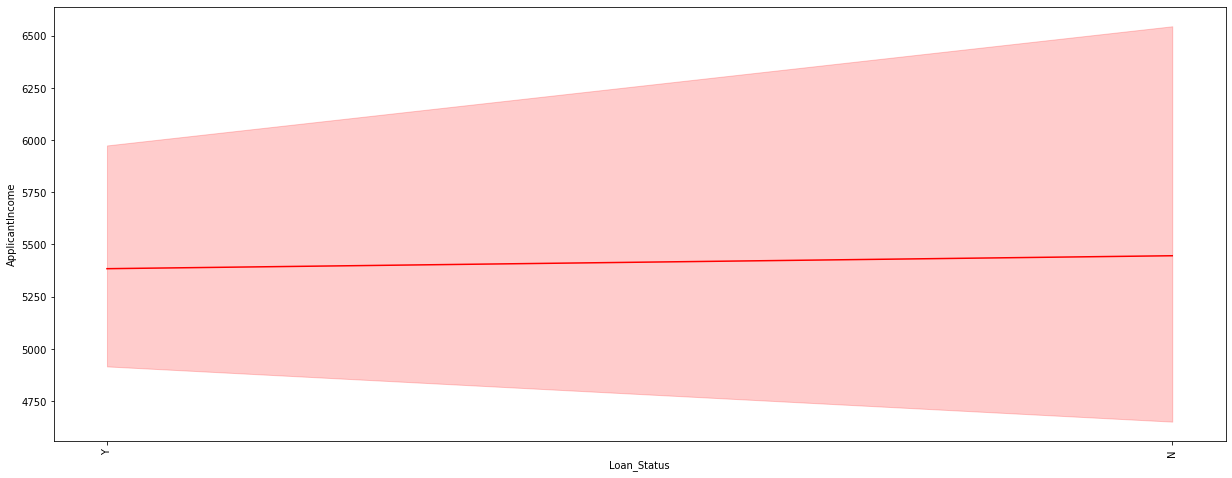



The Line Plot for the attribute "Loan_Status" & "CoapplicantIncome" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


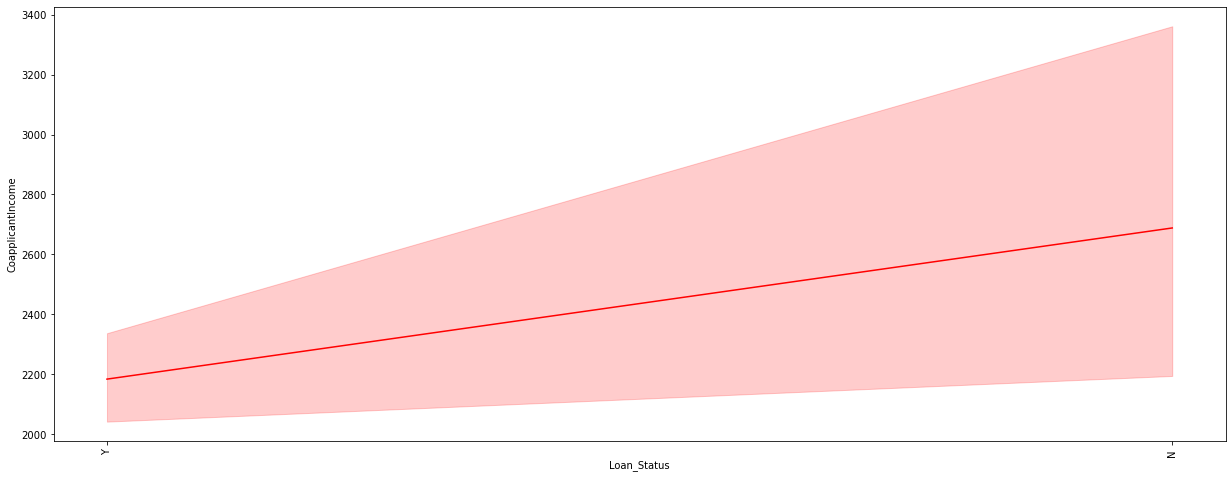



The Line Plot for the attribute "Loan_Status" & "LoanAmount" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


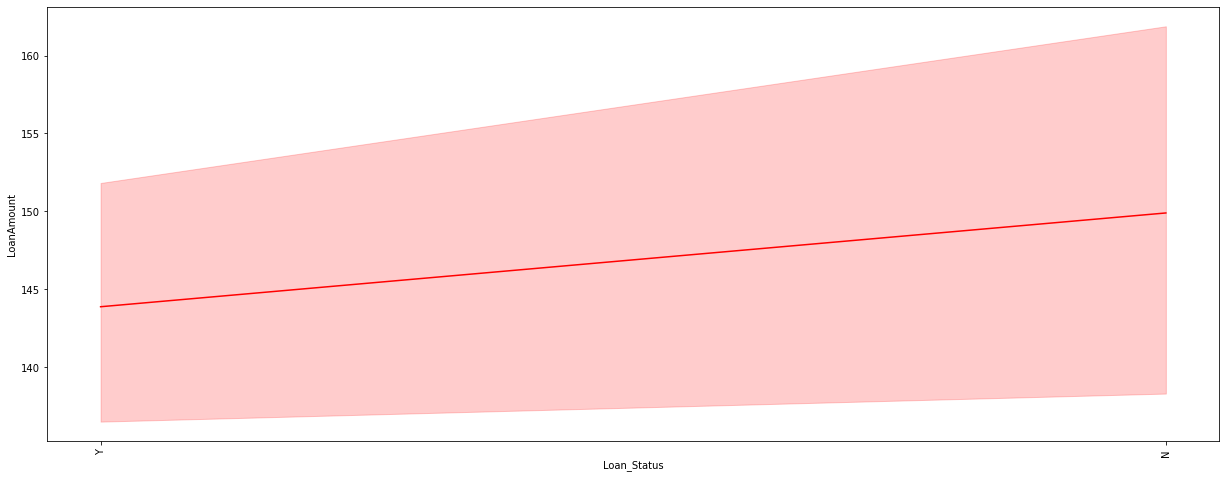



The Line Plot for the attribute "Loan_Status" & "Loan_Amount_Term" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


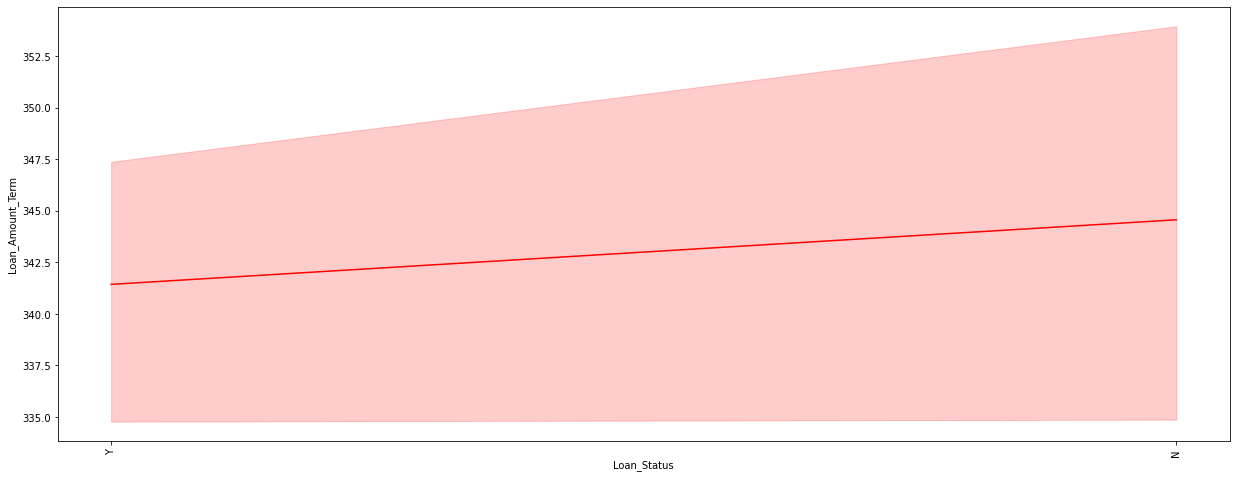



The Line Plot for the attribute "Loan_Status" & "Credit_History" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


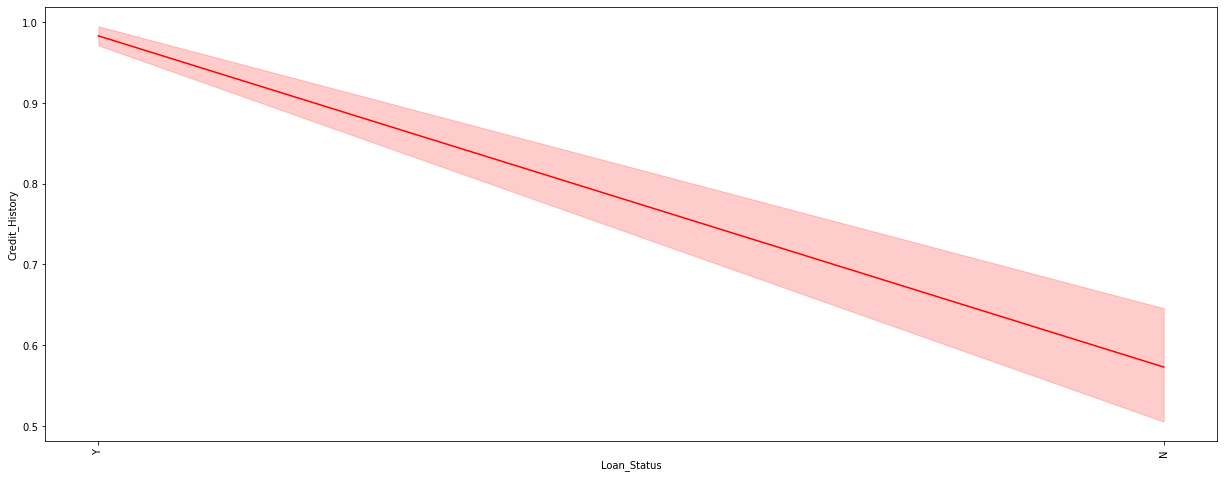



The Line Plot for the attribute "Loan_Status" & "Property_Area" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


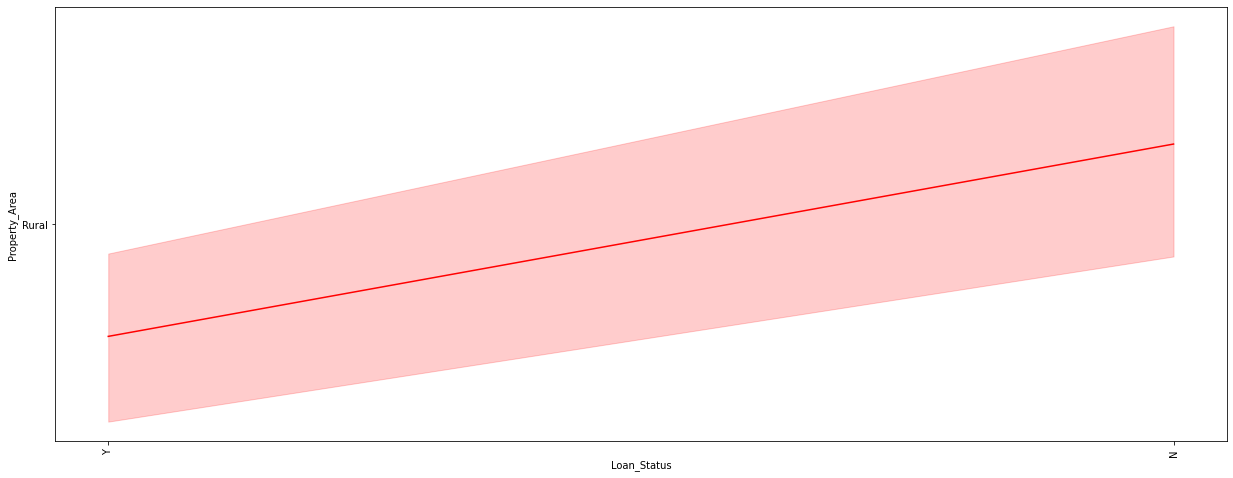



The Line Plot for the attribute "Loan_Status" & "Loan_Status" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


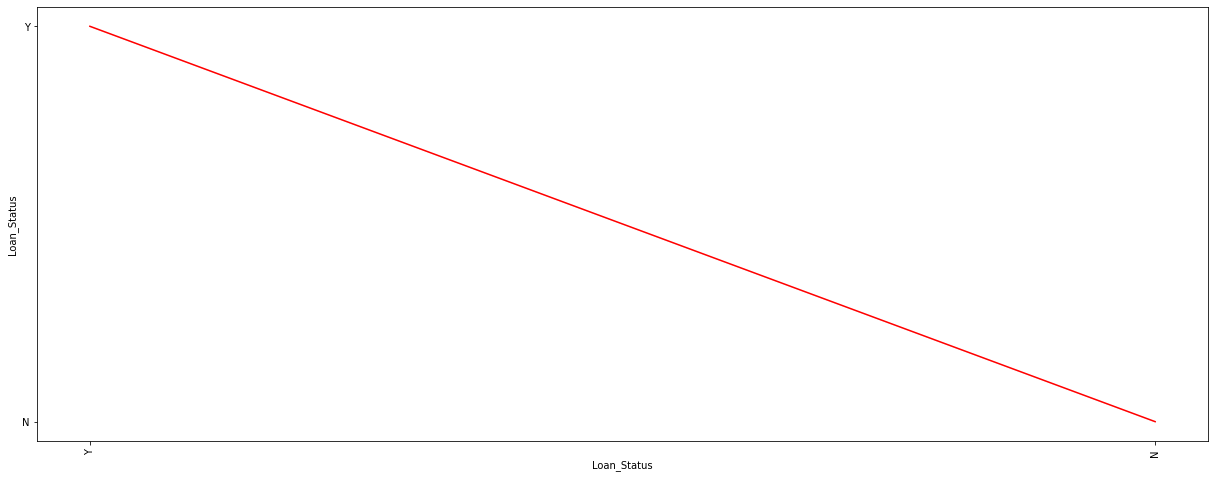

In [23]:
for i in df.columns:
    plt.figure(figsize=(21,8))
    print(f'The Line Plot for the attribute "Loan_Status" & "{i}" is-\n {sns.lineplot(df.Loan_Status,df[i],color="red")}')
    plt.xticks(rotation=90)
    plt.show()
    print('\n')

These graphs are showing the distribution trend w.r.t. target variable.

# 5.Categorical Plotting

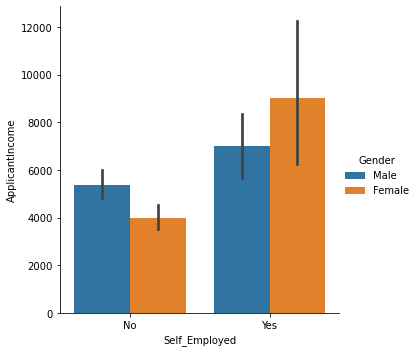

In [24]:
sns.catplot(x='Self_Employed',y='ApplicantIncome',hue='Gender',data=df,kind='bar')
plt.show()

The female self_employed applicants who are applied for the loan has income around 9000

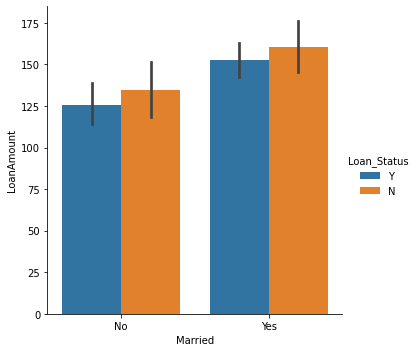

In [25]:
sns.catplot(x='Married',y='LoanAmount',hue='Loan_Status',data=df,kind='bar')
plt.show()

The married applicants who has applied for the loan amount approx 150 are approved for the loan whereas the married applicants who has applied for the loan amount approx 165 are not eligible for the loan

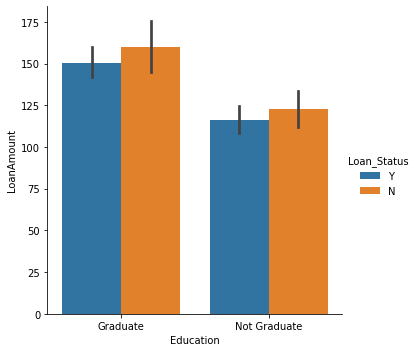

In [26]:
sns.catplot(x='Education',y='LoanAmount',hue='Loan_Status',data=df,kind='bar')
plt.show()

Most of the applicants who are graduate and applied for the loan amount approx 150 are approved for taking the loan where as if they apply above 160 they are not eligible for the loan

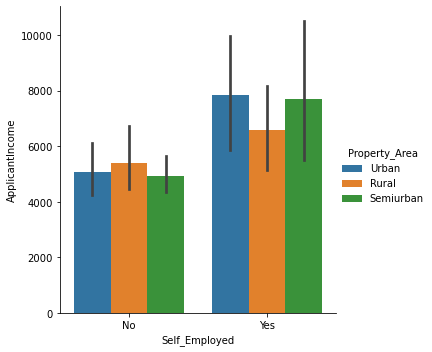

In [27]:
sns.catplot(x='Self_Employed',y='ApplicantIncome',hue='Property_Area',data=df,kind='bar')
plt.show()

Self-employed people who lives in urban area has the highest income of approx 8000

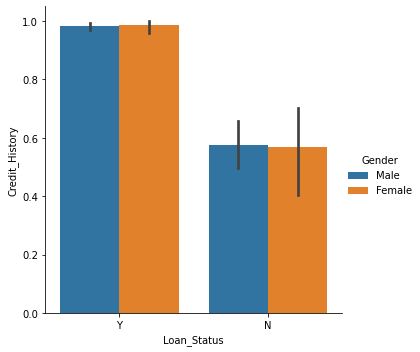

In [28]:
sns.catplot(x='Loan_Status',y='Credit_History',hue='Gender',data=df,kind='bar')
plt.show()

Those Male and female both the applicants who has atleast 1 credit history are eligible for the loan

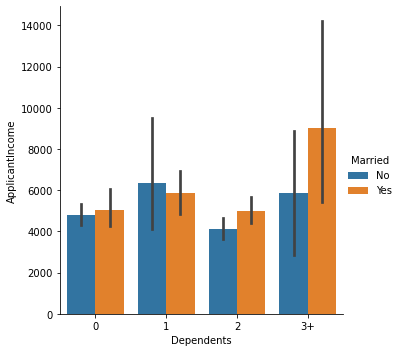

In [29]:
sns.catplot(x='Dependents',y='ApplicantIncome',hue='Married',data=df,kind='bar')
plt.show()

Applicant those are married and having three and above dependents in the family have income of more than 8000

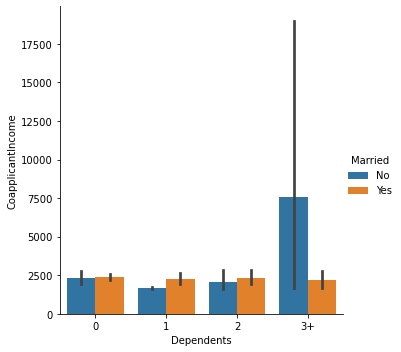

In [30]:
sns.catplot(x='Dependents',y='CoapplicantIncome',hue='Married',data=df,kind='bar')
plt.show()

Applicants those are not married and having three and above independents in the family,their coapplicant income is approx 6000

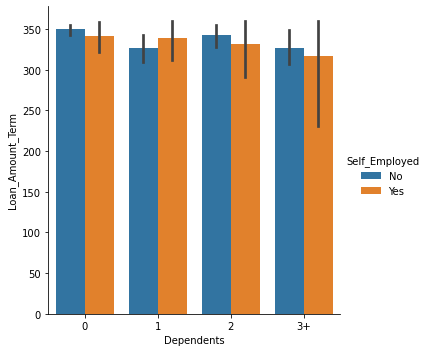

In [32]:
sns.catplot(x='Dependents',y='Loan_Amount_Term',hue='Self_Employed',data=df,kind='bar')
plt.show()

Applicants who are not self-employed and have no dependents in the family has taken loan tenure as approx 350Months

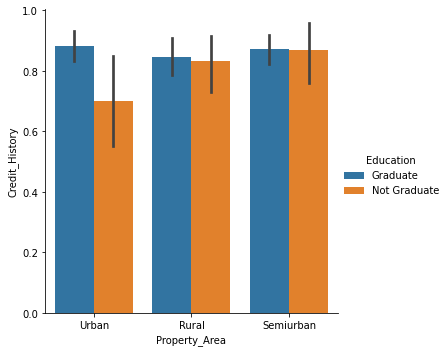

In [33]:
sns.catplot(x='Property_Area',y='Credit_History',hue='Education',data=df,kind='bar')
plt.show()

Applicants those are graduate and living in urban areas has credit history as 1 and they are eligible for loan in most of the cases

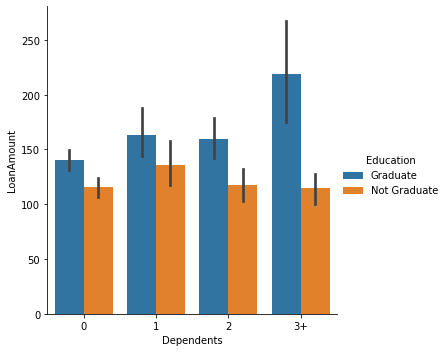

In [34]:
sns.catplot(x='Dependents',y='LoanAmount',hue='Education',data=df,kind='bar')
plt.show()

Graduate applicants having more than 3 dependents in the family has applied for the loan amount of approx 225



# 6.ViolinPlot

The Violin-Plot for the attribute Loan_ID is-
 AxesSubplot(0.125,0.125;0.775x0.755)


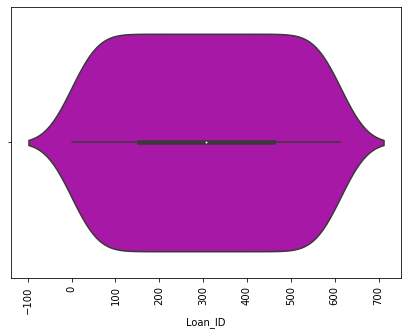



The Violin-Plot for the attribute Gender is-
 AxesSubplot(0.125,0.125;0.775x0.755)


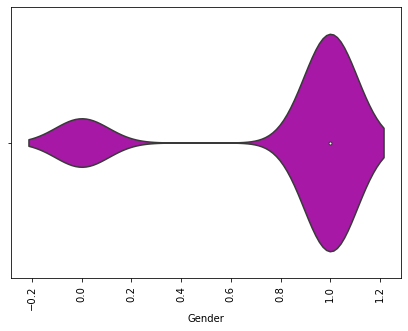



The Violin-Plot for the attribute Married is-
 AxesSubplot(0.125,0.125;0.775x0.755)


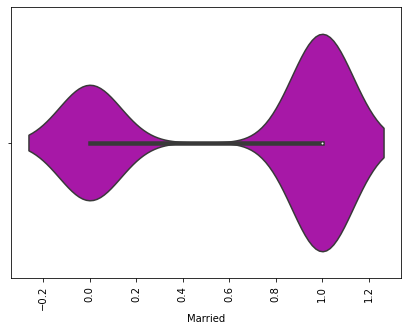



The Violin-Plot for the attribute Dependents is-
 AxesSubplot(0.125,0.125;0.775x0.755)


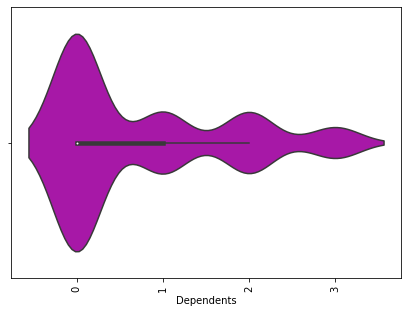



The Violin-Plot for the attribute Education is-
 AxesSubplot(0.125,0.125;0.775x0.755)


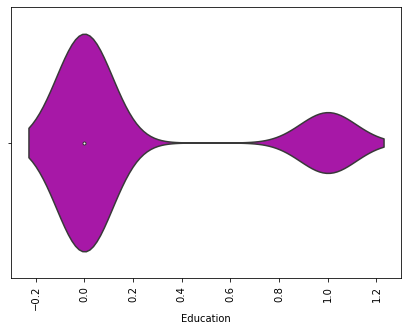



The Violin-Plot for the attribute Self_Employed is-
 AxesSubplot(0.125,0.125;0.775x0.755)


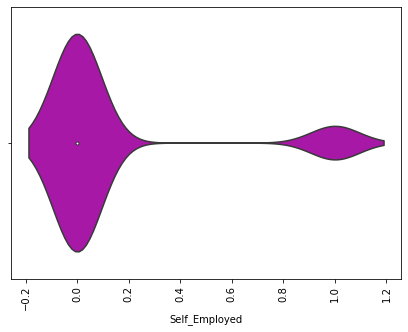



The Violin-Plot for the attribute ApplicantIncome is-
 AxesSubplot(0.125,0.125;0.775x0.755)


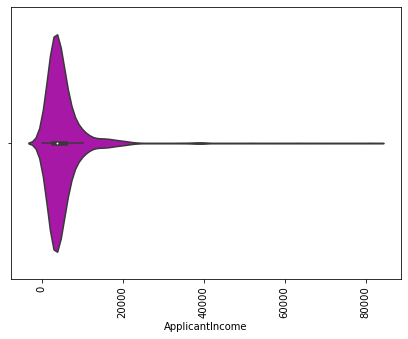



The Violin-Plot for the attribute CoapplicantIncome is-
 AxesSubplot(0.125,0.125;0.775x0.755)


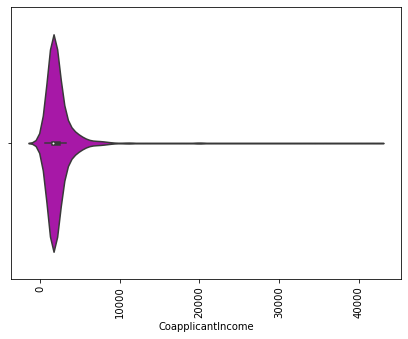



The Violin-Plot for the attribute LoanAmount is-
 AxesSubplot(0.125,0.125;0.775x0.755)


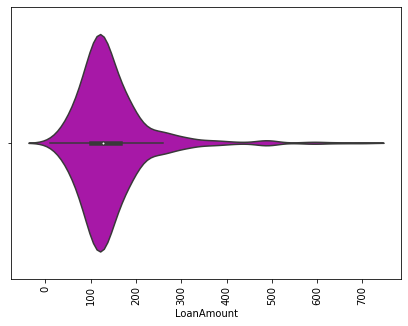



The Violin-Plot for the attribute Loan_Amount_Term is-
 AxesSubplot(0.125,0.125;0.775x0.755)


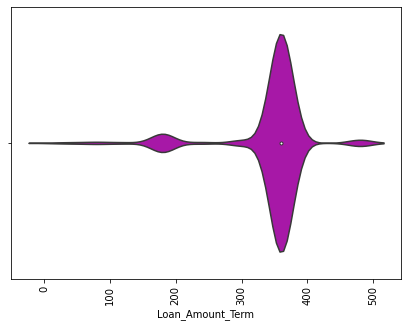



The Violin-Plot for the attribute Credit_History is-
 AxesSubplot(0.125,0.125;0.775x0.755)


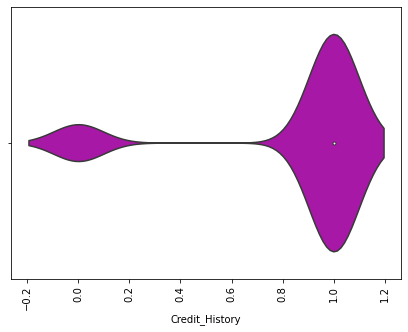



The Violin-Plot for the attribute Property_Area is-
 AxesSubplot(0.125,0.125;0.775x0.755)


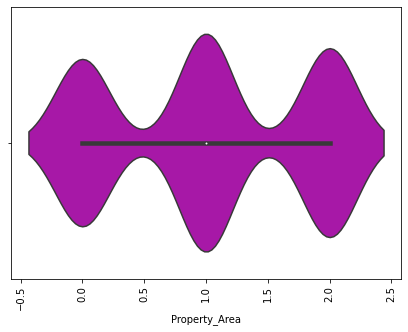



The Violin-Plot for the attribute Loan_Status is-
 AxesSubplot(0.125,0.125;0.775x0.755)


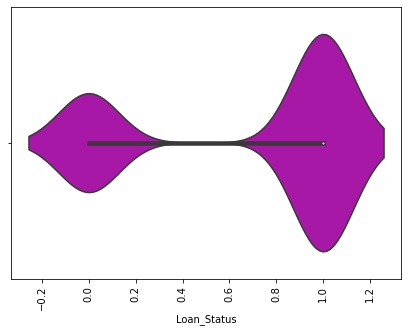

In [37]:
for i in df.columns:
    plt.figure(figsize=(7,5))
    print(f'The Violin-Plot for the attribute {i} is-\n {sns.violinplot(df[i],color="m")}')
    plt.xticks(rotation=90)
    plt.show()
    print('\n')

1. As we can see in this plot we can say that most of the applicants have income range b/w (0-20000) and coapplicants income range in b/w (0-10000).
2. Most of the applicants are applying for the loan amount range b/w(100-200) and having tenure range (360-400)

# 7.Pairplot

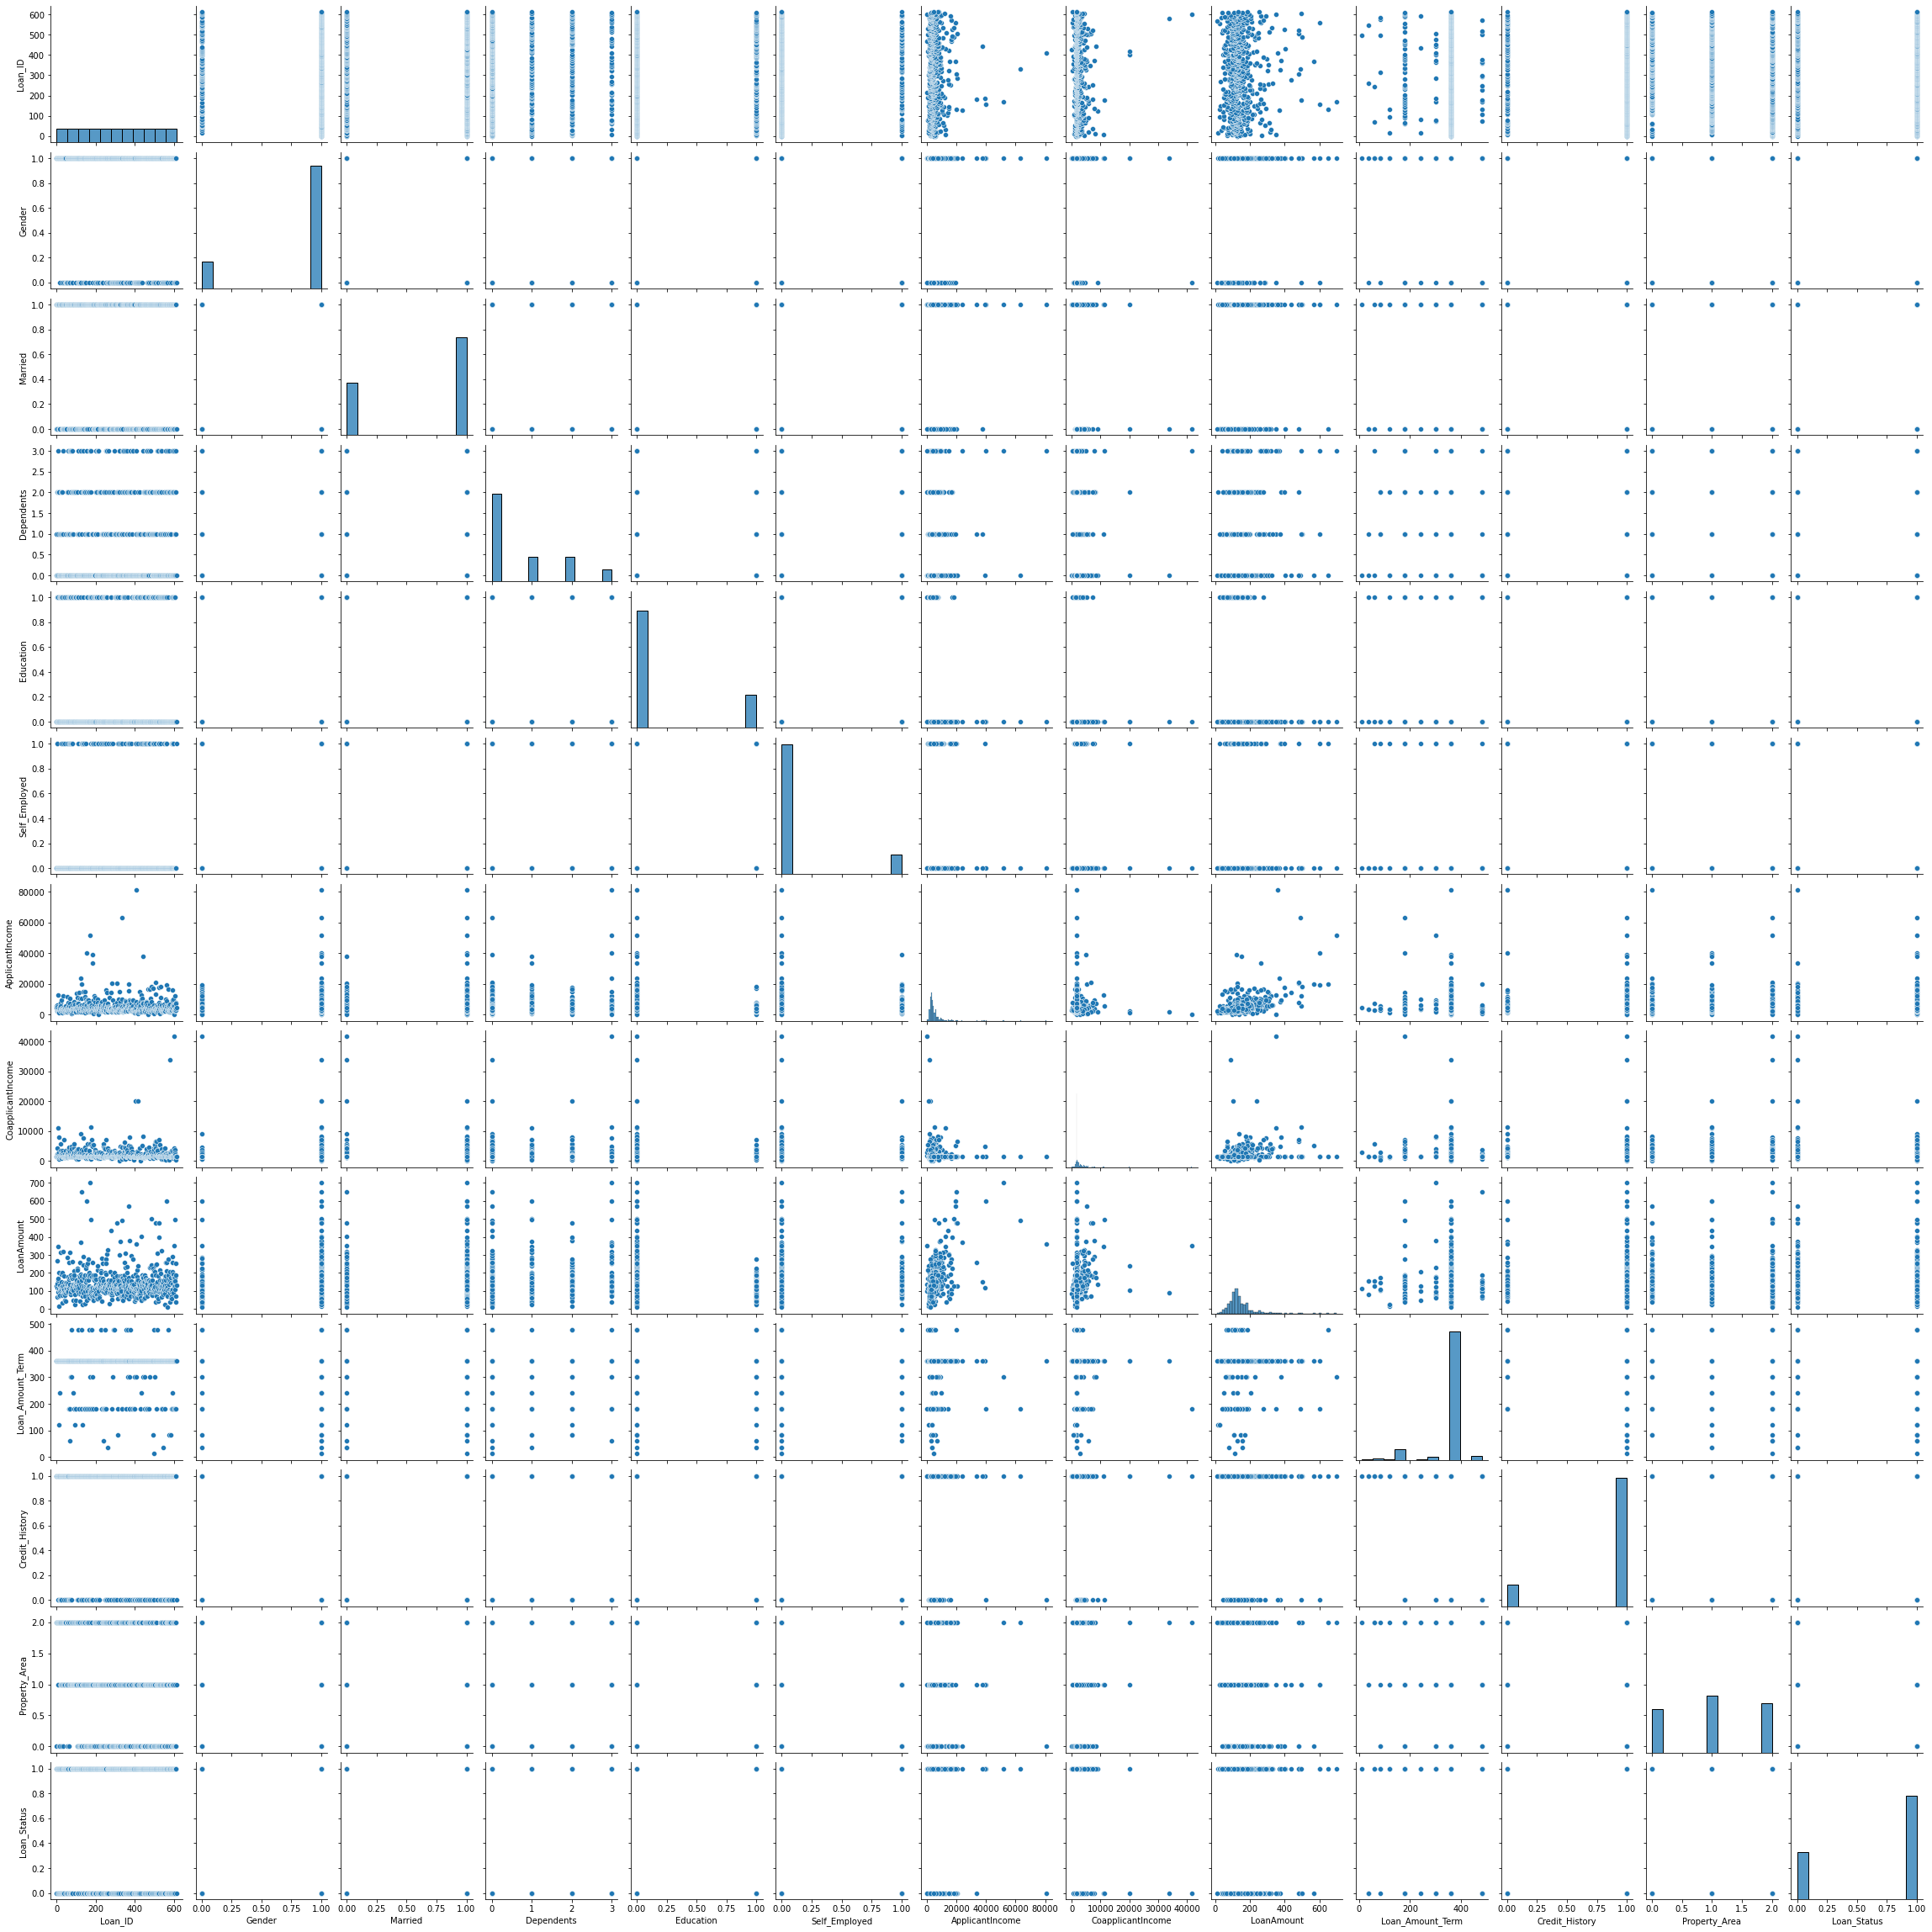

In [38]:
sns.pairplot(df)
plt.show()

# Label Encoding

In [35]:
from sklearn.preprocessing import LabelEncoder

p=['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
for u in p:
    df[u]=LabelEncoder().fit_transform(df[u].astype(str))

In [36]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,1621.245798,128.0,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.000000,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,1621.245798,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.000000,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,1621.245798,141.0,360.0,1.0,2,1


# Descriptie Statistics

In [39]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Loan_ID,614.0,306.500000,177.390811,0.000000,153.250000,306.500000,459.75,613.0
Gender,614.0,0.817590,0.386497,0.000000,1.000000,1.000000,1.00,1.0
Married,614.0,0.653094,0.476373,0.000000,0.000000,1.000000,1.00,1.0
Dependents,614.0,0.744300,1.009623,0.000000,0.000000,0.000000,1.00,3.0
Education,614.0,0.218241,0.413389,0.000000,0.000000,0.000000,0.00,1.0
Self_Employed,614.0,0.133550,0.340446,0.000000,0.000000,0.000000,0.00,1.0
ApplicantIncome,614.0,5403.459283,6109.041673,150.000000,2877.500000,3812.500000,5795.00,81000.0
CoapplicantIncome,614.0,2342.092871,2621.427966,16.120001,1621.245798,1621.245798,2297.25,41667.0
LoanAmount,614.0,145.752443,84.107233,9.000000,100.250000,128.000000,164.75,700.0
Loan_Amount_Term,614.0,342.410423,64.428629,12.000000,360.000000,360.000000,360.00,480.0


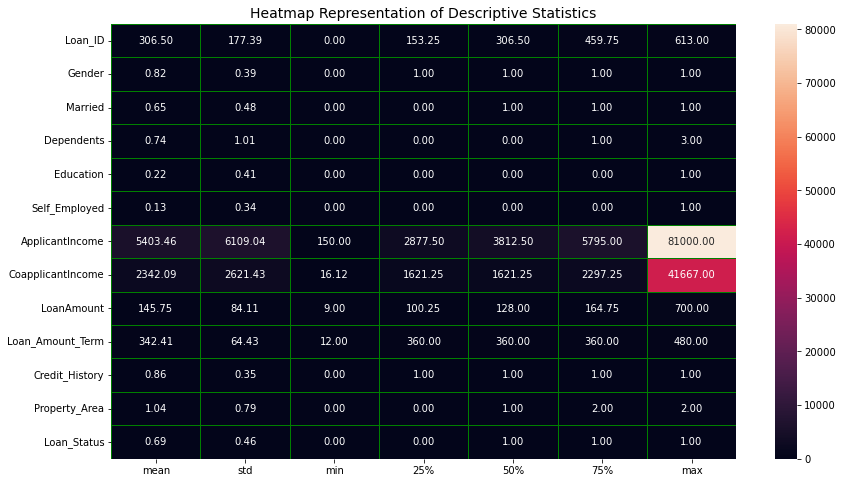

In [40]:
# Plotting heatmap for the statistical summary of the dataset.
plt.figure(figsize=(14,8))
sns.heatmap(df.describe()[1:].T,annot=True,linecolor='Green',linewidth='1',fmt='0.2f')
plt.title('Heatmap Representation of Descriptive Statistics',fontsize=14)
plt.show() 

# Correlation of variables

In [41]:
df.corr()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.028029,-0.016013,0.051559,0.039442,0.032874,0.016925,0.048022,0.036872,-0.033028,-0.030603,-0.155416,0.011773
Gender,-0.028029,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.024156,0.106904,-0.074030,0.009170,-0.025752,0.017987
Married,-0.016013,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,-0.017504,0.146546,-0.100912,0.010938,0.004257,0.091478
Dependents,0.051559,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.031776,0.163103,-0.103864,-0.040160,-0.000244,0.010118
Education,0.039442,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.088032,-0.168759,-0.073928,-0.073658,-0.065243,-0.085884
Self_Employed,0.032874,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,0.013265,0.115100,-0.033739,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.016925,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.050734,0.565181,-0.046531,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.048022,0.024156,-0.017504,0.031776,-0.088032,0.013265,-0.050734,1.000000,0.206453,-0.073210,0.008339,0.028111,-0.089189
LoanAmount,0.036872,0.106904,0.146546,0.163103,-0.168759,0.115100,0.565181,0.206453,1.000000,0.036960,-0.000607,-0.046632,-0.033214
Loan_Amount_Term,-0.033028,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.046531,-0.073210,0.036960,1.000000,-0.004705,-0.076120,-0.022549


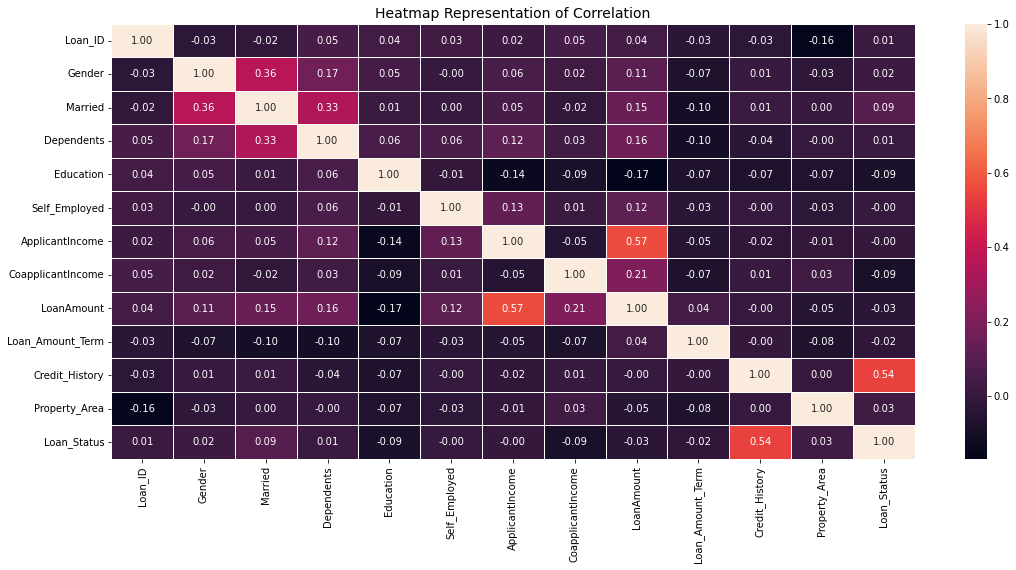

In [42]:
# Plotting Heatmap for the correlation table.
plt.figure(figsize=(18,8))
sns.heatmap(df.corr(),annot=True,linecolor='white',linewidth='1',fmt='0.2f')
plt.title('Heatmap Representation of Correlation',fontsize=14)
plt.show()

# Multicollinearity

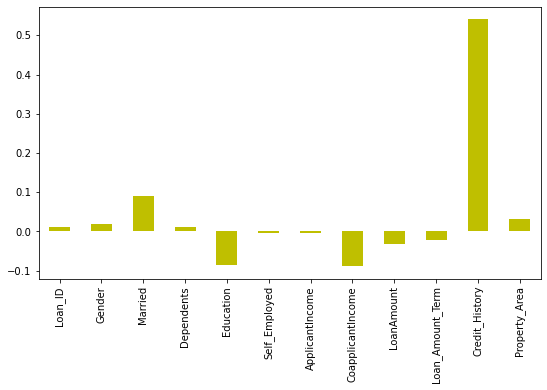

In [43]:
plt.figure(figsize=(9,5))
df.corr().Loan_Status.drop(['Loan_Status']).plot(kind='bar',color='y')
plt.show()

# Skewness

In [44]:
df.skew().sort_values()

Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Gender              -1.648795
Loan_Status         -0.809998
Married             -0.644850
Property_Area       -0.066196
Loan_ID              0.000000
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
LoanAmount           2.743053
ApplicantIncome      6.539513
CoapplicantIncome    9.677699
dtype: float64

The threshold value of Skewness is +/=0.5. Attributes- Property_Area,Loan_ID are only in the range while others are either skewed right or left.

# Distribution Plot

Here we can now check the normal distribution pattern for each of the attributes which are skewed left or right hand side

The Distribution Plot for attribute Loan_ID is-
 AxesSubplot(0.125,0.125;0.775x0.755)


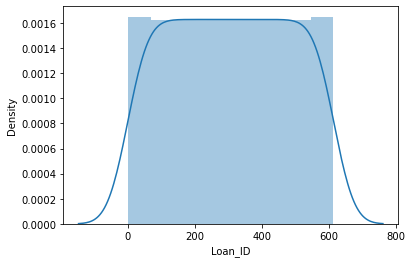



The Distribution Plot for attribute Gender is-
 AxesSubplot(0.125,0.125;0.775x0.755)


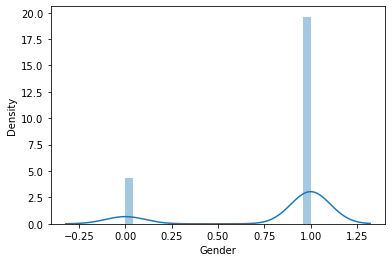



The Distribution Plot for attribute Married is-
 AxesSubplot(0.125,0.125;0.775x0.755)


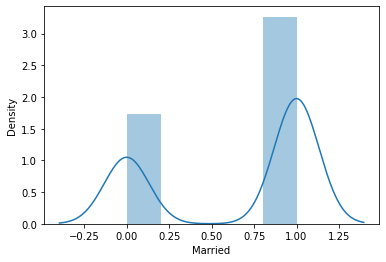



The Distribution Plot for attribute Dependents is-
 AxesSubplot(0.125,0.125;0.775x0.755)


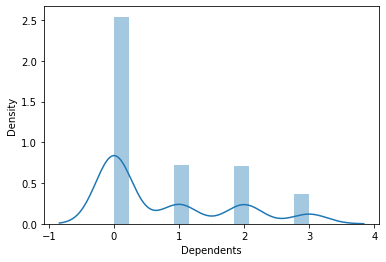



The Distribution Plot for attribute Education is-
 AxesSubplot(0.125,0.125;0.775x0.755)


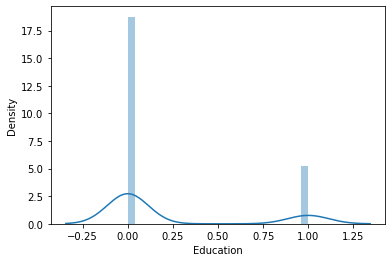



The Distribution Plot for attribute Self_Employed is-
 AxesSubplot(0.125,0.125;0.775x0.755)


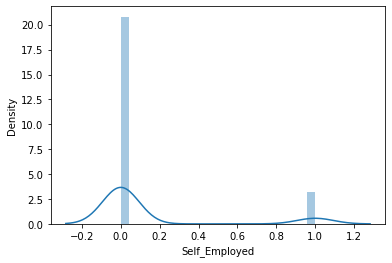



The Distribution Plot for attribute ApplicantIncome is-
 AxesSubplot(0.125,0.125;0.775x0.755)


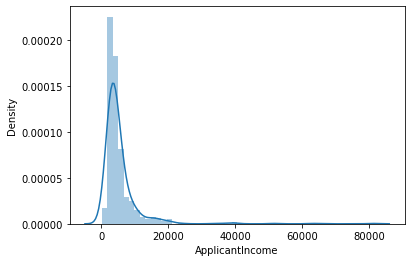



The Distribution Plot for attribute CoapplicantIncome is-
 AxesSubplot(0.125,0.125;0.775x0.755)


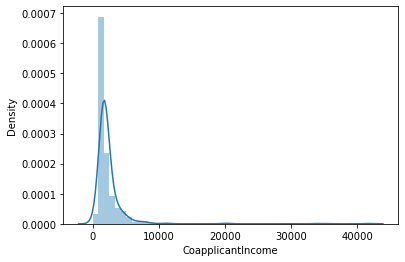



The Distribution Plot for attribute LoanAmount is-
 AxesSubplot(0.125,0.125;0.775x0.755)


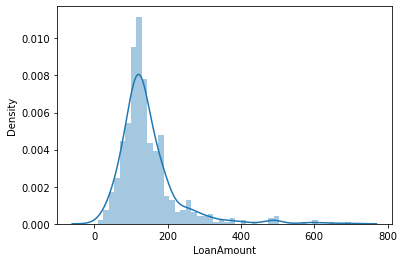



The Distribution Plot for attribute Loan_Amount_Term is-
 AxesSubplot(0.125,0.125;0.775x0.755)


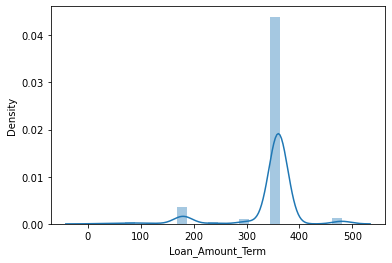



The Distribution Plot for attribute Credit_History is-
 AxesSubplot(0.125,0.125;0.775x0.755)


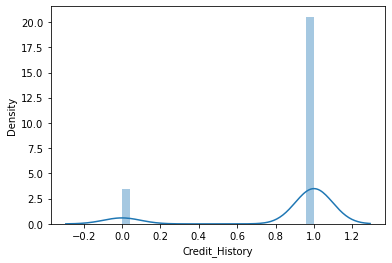



The Distribution Plot for attribute Property_Area is-
 AxesSubplot(0.125,0.125;0.775x0.755)


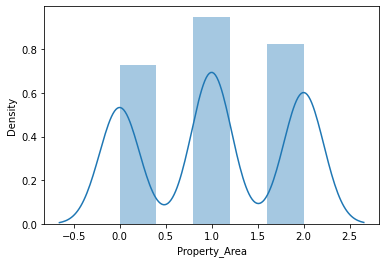



The Distribution Plot for attribute Loan_Status is-
 AxesSubplot(0.125,0.125;0.775x0.755)


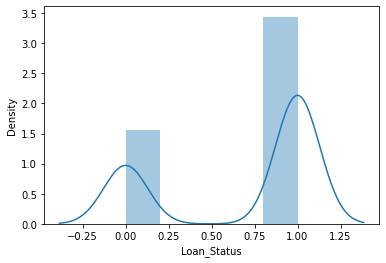

In [45]:
for i in df.columns:
    print(f'The Distribution Plot for attribute {i} is-\n {sns.distplot(df[i])}')
    plt.show()
    print('\n')

As we can see in the above distribution plots all of the attributes are skewed both right ad left hand side.Ergo,i'll remove the skewness later on the data cleansing section by power transfrorm or boxcox method or square_root or log method

# Outliers

In [47]:
from scipy.stats import zscore

z=np.abs(zscore(df))
np.where(z>3)

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
        183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
        432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
        600, 604], dtype=int64),
 array([7, 9, 9, 9, 6, 8, 9, 6, 8, 6, 8, 7, 8, 6, 6, 9, 9, 8, 8, 9, 6, 8,
        8, 7, 6, 7, 8, 6, 8, 9, 9, 8, 8, 8, 9, 8, 9, 7, 9, 7, 8],
       dtype=int64))

we can see that there are lots of rows and columns are present having outliers

# Boxplots To check the Outliers

The Box-Plot for attribute Loan_ID is-
 AxesSubplot(0.125,0.125;0.775x0.755)


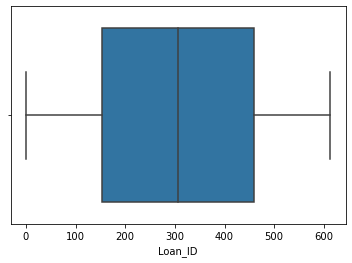



The Box-Plot for attribute Gender is-
 AxesSubplot(0.125,0.125;0.775x0.755)


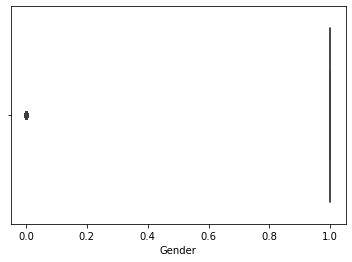



The Box-Plot for attribute Married is-
 AxesSubplot(0.125,0.125;0.775x0.755)


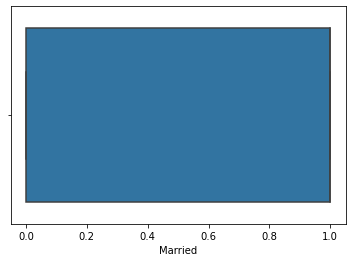



The Box-Plot for attribute Dependents is-
 AxesSubplot(0.125,0.125;0.775x0.755)


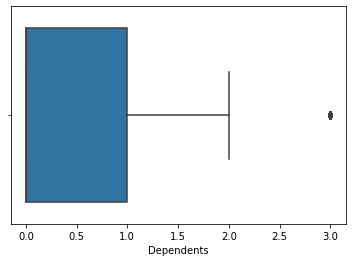



The Box-Plot for attribute Education is-
 AxesSubplot(0.125,0.125;0.775x0.755)


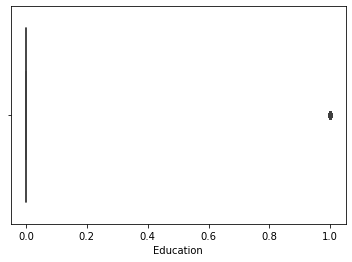



The Box-Plot for attribute Self_Employed is-
 AxesSubplot(0.125,0.125;0.775x0.755)


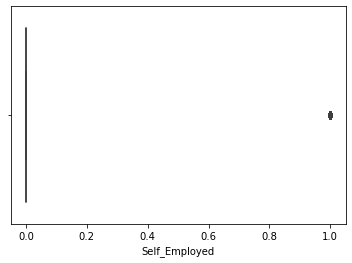



The Box-Plot for attribute ApplicantIncome is-
 AxesSubplot(0.125,0.125;0.775x0.755)


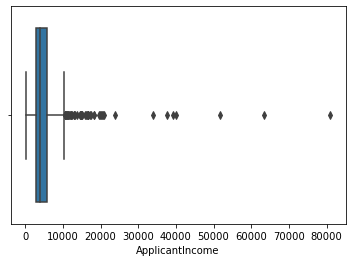



The Box-Plot for attribute CoapplicantIncome is-
 AxesSubplot(0.125,0.125;0.775x0.755)


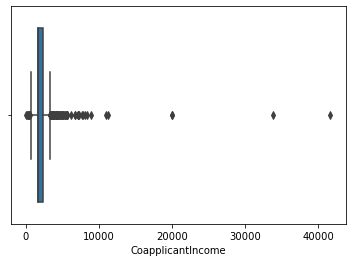



The Box-Plot for attribute LoanAmount is-
 AxesSubplot(0.125,0.125;0.775x0.755)


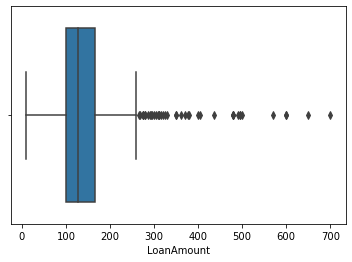



The Box-Plot for attribute Loan_Amount_Term is-
 AxesSubplot(0.125,0.125;0.775x0.755)


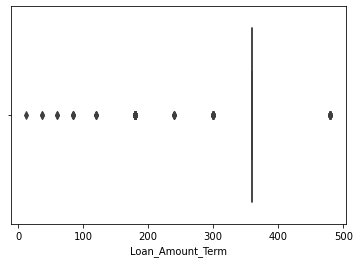



The Box-Plot for attribute Credit_History is-
 AxesSubplot(0.125,0.125;0.775x0.755)


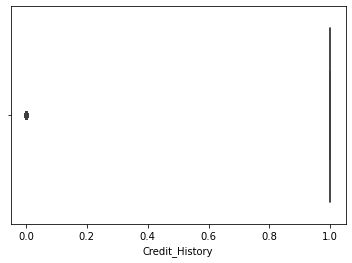



The Box-Plot for attribute Property_Area is-
 AxesSubplot(0.125,0.125;0.775x0.755)


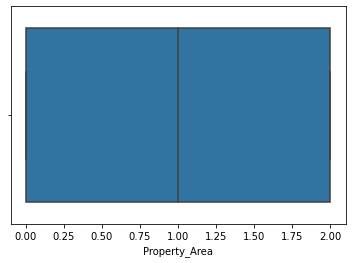



The Box-Plot for attribute Loan_Status is-
 AxesSubplot(0.125,0.125;0.775x0.755)


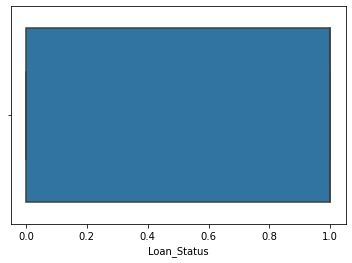

In [48]:
for i in df.columns:
    print(f'The Box-Plot for attribute {i} is-\n {sns.boxplot(df[i])}')
    plt.show()
    print('\n')

# Data Cleansing

# 1. Remove Negative Correlation

In [49]:
#removing negative correlated columns
df1=df.drop(['CoapplicantIncome','LoanAmount','Loan_Amount_Term','ApplicantIncome'],axis=1)
df1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,1.0,2,1
1,1,1,1,1,0,0,1.0,0,0
2,2,1,1,0,0,1,1.0,2,1
3,3,1,1,0,1,0,1.0,2,1
4,4,1,0,0,0,0,1.0,2,1
...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,1.0,0,1
610,610,1,1,3,0,0,1.0,0,1
611,611,1,1,1,0,0,1.0,2,1
612,612,1,1,2,0,0,1.0,2,1


# 2.Removing Multicollinearity

In [50]:
x=df1.iloc[:,0:-1]
x

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
0,0,1,0,0,0,0,1.0,2
1,1,1,1,1,0,0,1.0,0
2,2,1,1,0,0,1,1.0,2
3,3,1,1,0,1,0,1.0,2
4,4,1,0,0,0,0,1.0,2
...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,1.0,0
610,610,1,1,3,0,0,1.0,0
611,611,1,1,1,0,0,1.0,2
612,612,1,1,2,0,0,1.0,2


In [51]:
import statsmodels.api
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [52]:
#calculating variance_inflation_factor Score
def vif():
    df2=pd.DataFrame()
    df2['Features']=x.columns
    df2['variance_inflation_factor']=[variance_inflation_factor(x.values,k) for k in range(x.shape[1])]
    print(df2)

In [53]:
vif()

         Features  variance_inflation_factor
0         Loan_ID                   3.172826
1          Gender                   5.276171
2         Married                   3.589790
3      Dependents                   1.763280
4       Education                   1.269759
5   Self_Employed                   1.151397
6  Credit_History                   4.594337
7   Property_Area                   2.374522


There is multicollinearity exist as we can see that attributes- (Loan_ID,Married) & (Dependents,Education,Self_Employed) are almost having same score but we can't apply it on these categorical variables hence will not drop any columns from the dataframe.

# 3.Removing Outliers

In [54]:
df3=df1[(z<3).all(axis=1)]
df3

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,1.0,2,1
1,1,1,1,1,0,0,1.0,0,0
2,2,1,1,0,0,1,1.0,2,1
3,3,1,1,0,1,0,1.0,2,1
4,4,1,0,0,0,0,1.0,2,1
...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,1.0,0,1
610,610,1,1,3,0,0,1.0,0,1
611,611,1,1,1,0,0,1.0,2,1
612,612,1,1,2,0,0,1.0,2,1


In [55]:
print(df1.shape)
print(df3.shape)

(614, 9)
(577, 9)


In [56]:
percentage_loss=(614-577)*100/614
percentage_loss

6.026058631921824

Since the threshold value I'm considering for the outliers is 10% but I'm getting here 6% which is ofcourse good since I've still 577 rows which i think a enough data and it will work good if i even consider the outliers removal,hence will remove the outliers

# 4.Removing Skewness

In [57]:
df3.skew().sort_values()

Credit_History   -1.976043
Gender           -1.622920
Loan_Status      -0.822635
Married          -0.630211
Property_Area    -0.055332
Loan_ID           0.010879
Dependents        1.052106
Education         1.306588
Self_Employed     2.252848
dtype: float64

Since except attribute Credit_History rest are categorical columns hence will remove skewness only in numeric column i.e. in Credit_History only (if the threshold value is greater than +/-0.5)

Using np.sqrt method to remove Skewness

In [59]:
df3['Credit_History']=np.sqrt(df3['Credit_History'])
df3['Credit_History']

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
609    1.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: Credit_History, Length: 577, dtype: float64

In [60]:
df3['Credit_History'].isnull().sum()

0

In [61]:
df3.skew().sort_values()

Credit_History   -1.976043
Gender           -1.622920
Loan_Status      -0.822635
Married          -0.630211
Property_Area    -0.055332
Loan_ID           0.010879
Dependents        1.052106
Education         1.306588
Self_Employed     2.252848
dtype: float64

Now as we can see that variable Credit_History is free from skewness

# Standard Scaler

In [62]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [63]:
x=df3.iloc[:,0:-1]
x

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
0,0,1,0,0,0,0,1.0,2
1,1,1,1,1,0,0,1.0,0
2,2,1,1,0,0,1,1.0,2
3,3,1,1,0,1,0,1.0,2
4,4,1,0,0,0,0,1.0,2
...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,1.0,0
610,610,1,1,3,0,0,1.0,0
611,611,1,1,1,0,0,1.0,2
612,612,1,1,2,0,0,1.0,2


In [64]:
x=sc.fit_transform(x)
x

array([[-1.72210857,  0.47713685, -1.36251079, ..., -0.38058018,
         0.41851254,  1.22747207],
       [-1.71644519,  0.47713685,  0.73393914, ..., -0.38058018,
         0.41851254, -1.30652215],
       [-1.71078181,  0.47713685,  0.73393914, ...,  2.62756724,
         0.41851254,  1.22747207],
       ...,
       [ 1.73821533,  0.47713685,  0.73393914, ..., -0.38058018,
         0.41851254,  1.22747207],
       [ 1.74387871,  0.47713685,  0.73393914, ..., -0.38058018,
         0.41851254,  1.22747207],
       [ 1.74954209, -2.09583477, -1.36251079, ...,  2.62756724,
        -2.38941464, -0.03952504]])

Mean is= -9.62065012673446e-18
Standard_Deviation= 1.0


AxesSubplot(0.125,0.125;0.775x0.755)


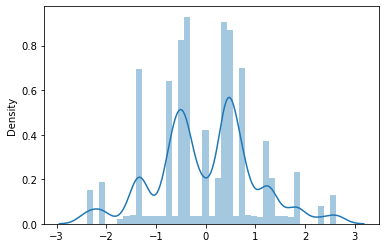

In [65]:
print('Mean is=',x.mean())
print('Standard_Deviation=',x.std())
print('\n')
print(sns.distplot(x))
plt.show()

Now,almost our features is normally distributed as we have got the mean almost as zero and standard deviation=1 i.e. data is fully transformed in b/w 0-1

# Principle Component Analysis(PCA)

In [66]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
x_pca=pca.fit_transform(x)
x_pca

array([[ 1.19015251, -2.05827393,  0.33414942],
       [-0.75392505, -0.83915176, -0.67964668],
       [-0.18257696, -1.72587216, -0.29870266],
       ...,
       [-0.82911018, -0.15869124, -0.44593247],
       [-1.3584348 , -0.10030269, -0.4006589 ],
       [ 2.31210653,  2.41432881,  0.81225698]])

In [67]:
#Features
x=x_pca
x

array([[ 1.19015251, -2.05827393,  0.33414942],
       [-0.75392505, -0.83915176, -0.67964668],
       [-0.18257696, -1.72587216, -0.29870266],
       ...,
       [-0.82911018, -0.15869124, -0.44593247],
       [-1.3584348 , -0.10030269, -0.4006589 ],
       [ 2.31210653,  2.41432881,  0.81225698]])

In [68]:
#target variable
y=df3['Loan_Status']
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 577, dtype: int32

# Plotting the Relationship b/w Principle Components

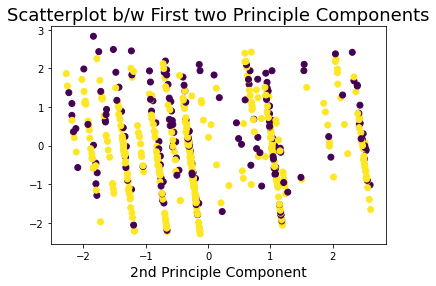

In [69]:
plt.scatter(x[:,0:1],x[:,1:2],c=y)
plt.xlabel('1st Principle Component',fontsize=14)
plt.xlabel('2nd Principle Component',fontsize=14)
plt.title('Scatterplot b/w First two Principle Components',fontsize=18)
plt.show()

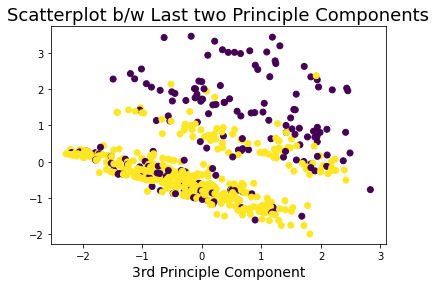

In [70]:
plt.scatter(x[:,1:2],x[:,2:3],c=y)
plt.xlabel('2nd Principle Component',fontsize=14)
plt.xlabel('3rd Principle Component',fontsize=14)
plt.title('Scatterplot b/w Last two Principle Components',fontsize=18)
plt.show()

In [71]:
#our Target variable classes needs to be balanced
y.value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

1 indicates that applicant will be approved for the loan amount whereas 0 means applicant will not be approved for the same

# Using IMBlearn Balancing Techniques

In [72]:
!pip install -U imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable


In [73]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y=sm.fit_resample(x,y)

In [74]:
y.value_counts()

1    398
0    398
Name: Loan_Status, dtype: int64

In [75]:
print(x.shape)
print(y.shape)

(796, 3)
(796,)


# Training_Testing Phase

In [76]:
#importing machine learning libraries for Classification model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
lr=LogisticRegression()

In [77]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=49)
lr.fit(x_train,y_train)
pred_test=lr.predict(x_test)
pred_train=lr.predict(x_train)
print(f'At random_state-{i} The Training and Testing Accuracy of the model is almost same')
print(f'Training accuracy of the model is\t {accuracy_score(pred_train,y_train)}')
print(f'Testing accuracy of the model is\t {accuracy_score(pred_test,y_test)}')
print(f'Confusion Matrix for the model is\n {confusion_matrix(pred_test,y_test)}')
print(f'Classification Report for the model is\n {classification_report(pred_test,y_test)}')

At random_state-Loan_Status The Training and Testing Accuracy of the model is almost same
Training accuracy of the model is	 0.699685534591195
Testing accuracy of the model is	 0.725
Confusion Matrix for the model is
 [[59 19]
 [25 57]]
Classification Report for the model is
               precision    recall  f1-score   support

           0       0.70      0.76      0.73        78
           1       0.75      0.70      0.72        82

    accuracy                           0.73       160
   macro avg       0.73      0.73      0.72       160
weighted avg       0.73      0.72      0.72       160



# CV Score

In [78]:
from sklearn.model_selection import cross_val_score

In [79]:
for i in range(2,12):
    cvs=cross_val_score(lr,x,y,cv=i)
    mean=cvs.mean()
    std=cvs.std()
    print(f'At K-Fold {i} the CV Score of the logistic model is {mean} and standard deviation is {std}\n')

At K-Fold 2 the CV Score of the logistic model is 0.579145728643216 and standard deviation is 0.02889447236180903

At K-Fold 3 the CV Score of the logistic model is 0.658353430746678 and standard deviation is 0.04654134848029379

At K-Fold 4 the CV Score of the logistic model is 0.6871859296482412 and standard deviation is 0.036127647850624105

At K-Fold 5 the CV Score of the logistic model is 0.6947720125786163 and standard deviation is 0.03567701532487269

At K-Fold 6 the CV Score of the logistic model is 0.6971690590111642 and standard deviation is 0.041360466964917776

At K-Fold 7 the CV Score of the logistic model is 0.6997138864861269 and standard deviation is 0.028271610824306542

At K-Fold 8 the CV Score of the logistic model is 0.7010479797979797 and standard deviation is 0.0481919535297308

At K-Fold 9 the CV Score of the logistic model is 0.693522301668369 and standard deviation is 0.04140568289326505

At K-Fold 10 the CV Score of the logistic model is 0.6958702531645569 and

In [80]:
cvs=cross_val_score(lr,x,y,cv=11)
mean=cvs.mean()
std=cvs.std()
print(f'At K-Fold 11 the CV Score of the logistic model is {mean} and standard deviation is {std}\n')

At K-Fold 11 the CV Score of the logistic model is 0.6947730731977307 and standard deviation is 0.05586172571948697



At each K-Fold I'm getting the same CV score which means model is very geniune and behaving well at each stages of training.Now lets try CV score for all other models

In [81]:
#importing other models of classification
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_curve,roc_auc_score
gb=GaussianNB()
mb=MultinomialNB()
neighbor=KNeighborsClassifier()
dtc=DecisionTreeClassifier()
svm=SVC()
rfc=RandomForestClassifier()
ad=AdaBoostClassifier()
grd=GradientBoostingClassifier()
sgd=SGDClassifier()

In [82]:
#creating a definition to expand the model individually
def model(algorithm,x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=18)
    algorithm.fit(x_train,y_train)
    pred_train_x=algorithm.predict(x_train)
    pred_test_y=algorithm.predict(x_test)
    print(f'For model {algorithm}')
    print('Training_Accuracy_Score=',accuracy_score(y_train,pred_train_x))
    print('Testing_Accuracy_Score=',accuracy_score(y_test,pred_test_y))
    print('\n Classification Report-\n',classification_report(y_test,pred_test_y))
    print('\n Confusion Metrix-\n',confusion_matrix(y_test,pred_test_y))
    print('\n\nAUC_ROC CURVE')
    prob=algorithm.predict_proba(x_test)[:,1]
    FPR,TPR,THRESHOLD=roc_curve(y_test,prob)
    plt.plot(FPR,TPR)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC_Curve for the model {algorithm}')
    plt.show()
    ROC_AUC_SCORE=roc_auc_score(y_test,pred_test_y)
    print('ROC AUC SCORE is-',ROC_AUC_SCORE)
    print('\n')
    print('Finding out the best K-Fold Value')
    print('\n\t')
    for l in range(2,8):
        cvscore=cross_val_score(algorithm,x,y,cv=l)
        cv_accuracy_score=cvscore.mean()
        print(f'At the K-Fold {l} the CV score of model {algorithm} is {cv_accuracy_score}')
        print('\n')

For model LogisticRegression()
Training_Accuracy_Score= 0.7185534591194969
Testing_Accuracy_Score= 0.65

 Classification Report-
               precision    recall  f1-score   support

           0       0.72      0.61      0.66        90
           1       0.58      0.70      0.64        70

    accuracy                           0.65       160
   macro avg       0.65      0.66      0.65       160
weighted avg       0.66      0.65      0.65       160


 Confusion Metrix-
 [[55 35]
 [21 49]]


AUC_ROC CURVE


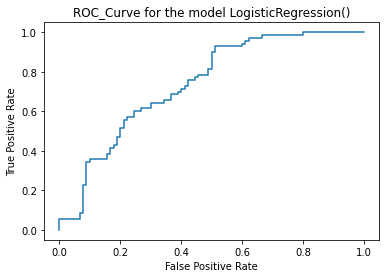

ROC AUC SCORE is- 0.6555555555555556


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model LogisticRegression() is 0.579145728643216


At the K-Fold 3 the CV score of model LogisticRegression() is 0.658353430746678


At the K-Fold 4 the CV score of model LogisticRegression() is 0.6871859296482412


At the K-Fold 5 the CV score of model LogisticRegression() is 0.6947720125786163


At the K-Fold 6 the CV score of model LogisticRegression() is 0.6971690590111642


At the K-Fold 7 the CV score of model LogisticRegression() is 0.6997138864861269




In [83]:
model(lr,x,y)

For model GaussianNB()
Training_Accuracy_Score= 0.7154088050314465
Testing_Accuracy_Score= 0.64375

 Classification Report-
               precision    recall  f1-score   support

           0       0.75      0.56      0.64        90
           1       0.57      0.76      0.65        70

    accuracy                           0.64       160
   macro avg       0.66      0.66      0.64       160
weighted avg       0.67      0.64      0.64       160


 Confusion Metrix-
 [[50 40]
 [17 53]]


AUC_ROC CURVE


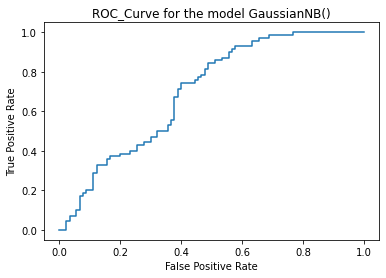

ROC AUC SCORE is- 0.6563492063492063


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model GaussianNB() is 0.5665829145728642


At the K-Fold 3 the CV score of model GaussianNB() is 0.6055847165082517


At the K-Fold 4 the CV score of model GaussianNB() is 0.6306532663316583


At the K-Fold 5 the CV score of model GaussianNB() is 0.6546069182389938


At the K-Fold 6 the CV score of model GaussianNB() is 0.6770239993924204


At the K-Fold 7 the CV score of model GaussianNB() is 0.6807727282808792




In [84]:
model(gb,x,y)

For model KNeighborsClassifier()
Training_Accuracy_Score= 0.8411949685534591
Testing_Accuracy_Score= 0.74375

 Classification Report-
               precision    recall  f1-score   support

           0       0.81      0.71      0.76        90
           1       0.68      0.79      0.73        70

    accuracy                           0.74       160
   macro avg       0.74      0.75      0.74       160
weighted avg       0.75      0.74      0.74       160


 Confusion Metrix-
 [[64 26]
 [15 55]]


AUC_ROC CURVE


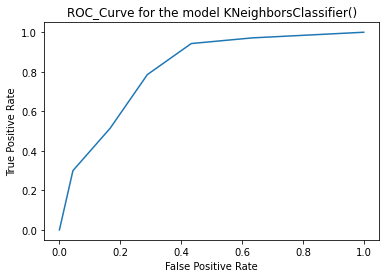

ROC AUC SCORE is- 0.7484126984126984


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model KNeighborsClassifier() is 0.6017587939698492


At the K-Fold 3 the CV score of model KNeighborsClassifier() is 0.6143944767579326


At the K-Fold 4 the CV score of model KNeighborsClassifier() is 0.6557788944723618


At the K-Fold 5 the CV score of model KNeighborsClassifier() is 0.6570754716981131


At the K-Fold 6 the CV score of model KNeighborsClassifier() is 0.6810207336523125


At the K-Fold 7 the CV score of model KNeighborsClassifier() is 0.6961097433850112




In [85]:
model(neighbor,x,y)

For model DecisionTreeClassifier()
Training_Accuracy_Score= 1.0
Testing_Accuracy_Score= 0.75

 Classification Report-
               precision    recall  f1-score   support

           0       0.83      0.70      0.76        90
           1       0.68      0.81      0.74        70

    accuracy                           0.75       160
   macro avg       0.75      0.76      0.75       160
weighted avg       0.76      0.75      0.75       160


 Confusion Metrix-
 [[63 27]
 [13 57]]


AUC_ROC CURVE


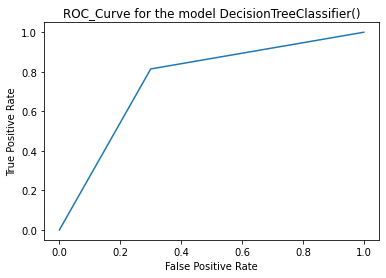

ROC AUC SCORE is- 0.7571428571428571


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model DecisionTreeClassifier() is 0.5866834170854272


At the K-Fold 3 the CV score of model DecisionTreeClassifier() is 0.5716224523573082


At the K-Fold 4 the CV score of model DecisionTreeClassifier() is 0.6017587939698492


At the K-Fold 5 the CV score of model DecisionTreeClassifier() is 0.6358018867924528


At the K-Fold 6 the CV score of model DecisionTreeClassifier() is 0.6571732361206045


At the K-Fold 7 the CV score of model DecisionTreeClassifier() is 0.6873489032315303




In [86]:
model(dtc,x,y)

For model RandomForestClassifier()
Training_Accuracy_Score= 1.0
Testing_Accuracy_Score= 0.775

 Classification Report-
               precision    recall  f1-score   support

           0       0.88      0.70      0.78        90
           1       0.69      0.87      0.77        70

    accuracy                           0.78       160
   macro avg       0.78      0.79      0.77       160
weighted avg       0.80      0.78      0.78       160


 Confusion Metrix-
 [[63 27]
 [ 9 61]]


AUC_ROC CURVE


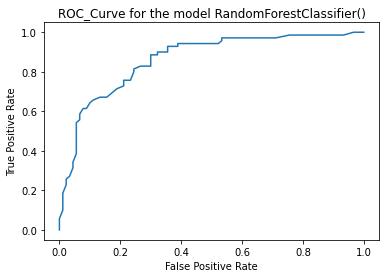

ROC AUC SCORE is- 0.7857142857142856


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model RandomForestClassifier() is 0.5690954773869347


At the K-Fold 3 the CV score of model RandomForestClassifier() is 0.6068000189152126


At the K-Fold 4 the CV score of model RandomForestClassifier() is 0.6507537688442211


At the K-Fold 5 the CV score of model RandomForestClassifier() is 0.6571383647798742


At the K-Fold 6 the CV score of model RandomForestClassifier() is 0.6696950710108606


At the K-Fold 7 the CV score of model RandomForestClassifier() is 0.706079357686251




In [87]:
model(rfc,x,y)

For model AdaBoostClassifier()
Training_Accuracy_Score= 0.7735849056603774
Testing_Accuracy_Score= 0.6375

 Classification Report-
               precision    recall  f1-score   support

           0       0.70      0.62      0.66        90
           1       0.57      0.66      0.61        70

    accuracy                           0.64       160
   macro avg       0.64      0.64      0.64       160
weighted avg       0.65      0.64      0.64       160


 Confusion Metrix-
 [[56 34]
 [24 46]]


AUC_ROC CURVE


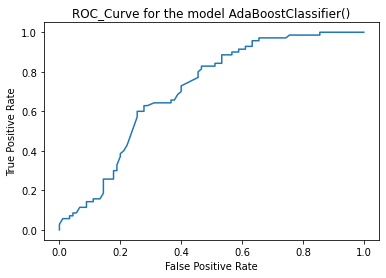

ROC AUC SCORE is- 0.6396825396825396


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model AdaBoostClassifier() is 0.5326633165829147


At the K-Fold 3 the CV score of model AdaBoostClassifier() is 0.5678866978767675


At the K-Fold 4 the CV score of model AdaBoostClassifier() is 0.6130653266331658


At the K-Fold 5 the CV score of model AdaBoostClassifier() is 0.6383805031446541


At the K-Fold 6 the CV score of model AdaBoostClassifier() is 0.6357275765170501


At the K-Fold 7 the CV score of model AdaBoostClassifier() is 0.6646372568589616




In [88]:
model(ad,x,y)

For model GradientBoostingClassifier()
Training_Accuracy_Score= 0.8930817610062893
Testing_Accuracy_Score= 0.7

 Classification Report-
               precision    recall  f1-score   support

           0       0.81      0.61      0.70        90
           1       0.62      0.81      0.70        70

    accuracy                           0.70       160
   macro avg       0.71      0.71      0.70       160
weighted avg       0.73      0.70      0.70       160


 Confusion Metrix-
 [[55 35]
 [13 57]]


AUC_ROC CURVE


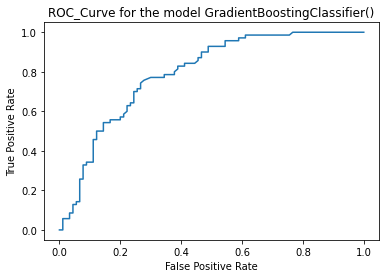

ROC AUC SCORE is- 0.7126984126984127


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model GradientBoostingClassifier() is 0.5653266331658291


At the K-Fold 3 the CV score of model GradientBoostingClassifier() is 0.5704260651629073


At the K-Fold 4 the CV score of model GradientBoostingClassifier() is 0.6394472361809045


At the K-Fold 5 the CV score of model GradientBoostingClassifier() is 0.6282625786163522


At the K-Fold 6 the CV score of model GradientBoostingClassifier() is 0.6319966583124478


At the K-Fold 7 the CV score of model GradientBoostingClassifier() is 0.6721449641803624




In [89]:
model(grd,x,y)

# Hyper Parameter Tuning

In [90]:
from sklearn.model_selection import GridSearchCV

In [91]:
#defining all the parameters of the respective models
Parameter_neighbor={'weights':['uniform', 'distance'],'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}
Parameter_dtc={'criterion':["gini", "entropy", "log_loss"],'splitter':["best", "random"],'max_features':["auto", "sqrt", "log2"]}
Parameter_rfc={'criterion' : ["gini", "entropy", "log_loss"],'max_features':["sqrt", "log2", None],'class_weight':["balanced", "balanced_subsample"]}
Parameter_ad={'algorithm':['SAMME', 'SAMME.R']}
Parameter_grd={'loss':['log_loss', 'deviance', 'exponential'],'criterion':['friedman_mse', 'squared_error', 'mse'],'max_features':['auto', 'sqrt', 'log2']}

In [92]:
#Now I'm defining a function so that i can individuallay let the model perfom and give the best parameter out of it.
def HPT(machine,dictionary):
    gd=GridSearchCV(machine,dictionary)
    gd.fit(x,y)
    print(f'The best Parameters of the model {machine} is {gd.best_params_}')

In [93]:
HPT(neighbor,Parameter_neighbor)

The best Parameters of the model KNeighborsClassifier() is {'algorithm': 'auto', 'weights': 'uniform'}


In [94]:
HPT(dtc,Parameter_dtc)

The best Parameters of the model DecisionTreeClassifier() is {'criterion': 'gini', 'max_features': 'sqrt', 'splitter': 'random'}


In [95]:
HPT(rfc,Parameter_rfc)

The best Parameters of the model RandomForestClassifier() is {'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_features': None}


In [96]:
HPT(ad,Parameter_ad)

The best Parameters of the model AdaBoostClassifier() is {'algorithm': 'SAMME'}


In [97]:
HPT(grd,Parameter_grd)

The best Parameters of the model GradientBoostingClassifier() is {'criterion': 'mse', 'loss': 'deviance', 'max_features': 'log2'}


In [98]:
#Redefining the models after getting the parameters
lr=LogisticRegression()
gb=GaussianNB()
neighbor=KNeighborsClassifier(algorithm='auto',weights='uniform')
dtc=DecisionTreeClassifier(criterion='entropy',max_features='auto',splitter='random')
rfc=RandomForestClassifier(class_weight= 'balanced',criterion='entropy',max_features='sqrt')
ad=AdaBoostClassifier(algorithm= 'SAMME')
grd=GradientBoostingClassifier(criterion='squared_error',loss= 'exponential',max_features= 'sqrt')

For model LogisticRegression()
Training_Accuracy_Score= 0.7185534591194969
Testing_Accuracy_Score= 0.65

 Classification Report-
               precision    recall  f1-score   support

           0       0.72      0.61      0.66        90
           1       0.58      0.70      0.64        70

    accuracy                           0.65       160
   macro avg       0.65      0.66      0.65       160
weighted avg       0.66      0.65      0.65       160


 Confusion Metrix-
 [[55 35]
 [21 49]]


AUC_ROC CURVE


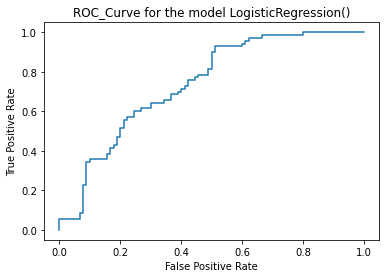

ROC AUC SCORE is- 0.6555555555555556


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model LogisticRegression() is 0.579145728643216


At the K-Fold 3 the CV score of model LogisticRegression() is 0.658353430746678


At the K-Fold 4 the CV score of model LogisticRegression() is 0.6871859296482412


At the K-Fold 5 the CV score of model LogisticRegression() is 0.6947720125786163


At the K-Fold 6 the CV score of model LogisticRegression() is 0.6971690590111642


At the K-Fold 7 the CV score of model LogisticRegression() is 0.6997138864861269




In [99]:
model(lr,x,y)

For model GaussianNB()
Training_Accuracy_Score= 0.7154088050314465
Testing_Accuracy_Score= 0.64375

 Classification Report-
               precision    recall  f1-score   support

           0       0.75      0.56      0.64        90
           1       0.57      0.76      0.65        70

    accuracy                           0.64       160
   macro avg       0.66      0.66      0.64       160
weighted avg       0.67      0.64      0.64       160


 Confusion Metrix-
 [[50 40]
 [17 53]]


AUC_ROC CURVE


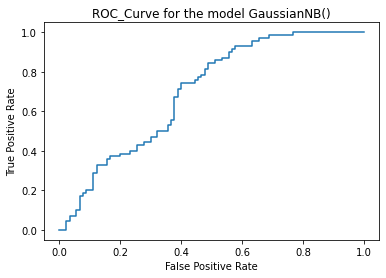

ROC AUC SCORE is- 0.6563492063492063


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model GaussianNB() is 0.5665829145728642


At the K-Fold 3 the CV score of model GaussianNB() is 0.6055847165082517


At the K-Fold 4 the CV score of model GaussianNB() is 0.6306532663316583


At the K-Fold 5 the CV score of model GaussianNB() is 0.6546069182389938


At the K-Fold 6 the CV score of model GaussianNB() is 0.6770239993924204


At the K-Fold 7 the CV score of model GaussianNB() is 0.6807727282808792




In [100]:
model(gb,x,y)

For model KNeighborsClassifier()
Training_Accuracy_Score= 0.8411949685534591
Testing_Accuracy_Score= 0.74375

 Classification Report-
               precision    recall  f1-score   support

           0       0.81      0.71      0.76        90
           1       0.68      0.79      0.73        70

    accuracy                           0.74       160
   macro avg       0.74      0.75      0.74       160
weighted avg       0.75      0.74      0.74       160


 Confusion Metrix-
 [[64 26]
 [15 55]]


AUC_ROC CURVE


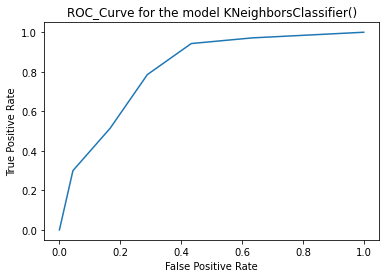

ROC AUC SCORE is- 0.7484126984126984


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model KNeighborsClassifier() is 0.6017587939698492


At the K-Fold 3 the CV score of model KNeighborsClassifier() is 0.6143944767579326


At the K-Fold 4 the CV score of model KNeighborsClassifier() is 0.6557788944723618


At the K-Fold 5 the CV score of model KNeighborsClassifier() is 0.6570754716981131


At the K-Fold 6 the CV score of model KNeighborsClassifier() is 0.6810207336523125


At the K-Fold 7 the CV score of model KNeighborsClassifier() is 0.6961097433850112




In [101]:
model(neighbor,x,y)

For model DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       splitter='random')
Training_Accuracy_Score= 1.0
Testing_Accuracy_Score= 0.74375

 Classification Report-
               precision    recall  f1-score   support

           0       0.81      0.71      0.76        90
           1       0.68      0.79      0.73        70

    accuracy                           0.74       160
   macro avg       0.74      0.75      0.74       160
weighted avg       0.75      0.74      0.74       160


 Confusion Metrix-
 [[64 26]
 [15 55]]


AUC_ROC CURVE


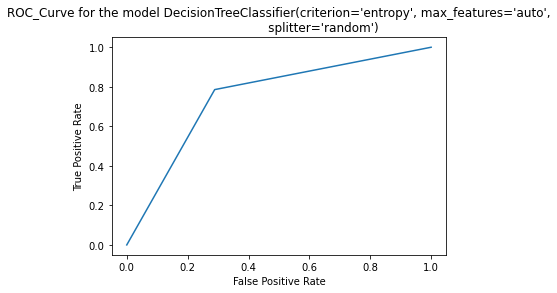

ROC AUC SCORE is- 0.7484126984126984


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       splitter='random') is 0.5552763819095478


At the K-Fold 3 the CV score of model DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       splitter='random') is 0.5515297678157659


At the K-Fold 4 the CV score of model DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       splitter='random') is 0.5866834170854272


At the K-Fold 5 the CV score of model DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       splitter='random') is 0.6180896226415095


At the K-Fold 6 the CV score of model DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       splitter='random') is 0.6018550163287005


At the K-Fold 7 the CV score of model DecisionTreeClassifier(criterion='entropy

In [102]:
model(dtc,x,y)

For model RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_features='sqrt')
Training_Accuracy_Score= 1.0
Testing_Accuracy_Score= 0.75

 Classification Report-
               precision    recall  f1-score   support

           0       0.83      0.70      0.76        90
           1       0.68      0.81      0.74        70

    accuracy                           0.75       160
   macro avg       0.75      0.76      0.75       160
weighted avg       0.76      0.75      0.75       160


 Confusion Metrix-
 [[63 27]
 [13 57]]


AUC_ROC CURVE


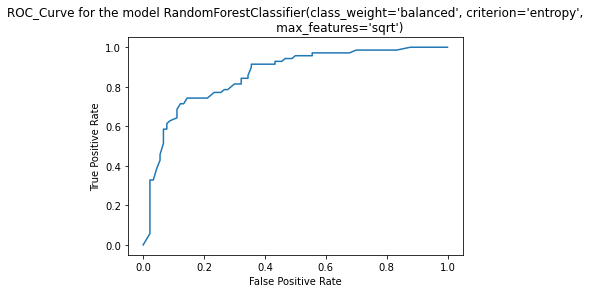

ROC AUC SCORE is- 0.7571428571428571


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_features='sqrt') is 0.5816582914572864


At the K-Fold 3 the CV score of model RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_features='sqrt') is 0.6080484229441527


At the K-Fold 4 the CV score of model RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_features='sqrt') is 0.6482412060301508


At the K-Fold 5 the CV score of model RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_features='sqrt') is 0.6683883647798742


At the K-Fold 6 the CV score of model RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_features='sqrt') is 0.655872636135794


At the K-Fold 7 the CV score of model RandomForest

In [103]:
model(rfc,x,y)

For model AdaBoostClassifier(algorithm='SAMME')
Training_Accuracy_Score= 0.7358490566037735
Testing_Accuracy_Score= 0.64375

 Classification Report-
               precision    recall  f1-score   support

           0       0.77      0.52      0.62        90
           1       0.57      0.80      0.66        70

    accuracy                           0.64       160
   macro avg       0.67      0.66      0.64       160
weighted avg       0.68      0.64      0.64       160


 Confusion Metrix-
 [[47 43]
 [14 56]]


AUC_ROC CURVE


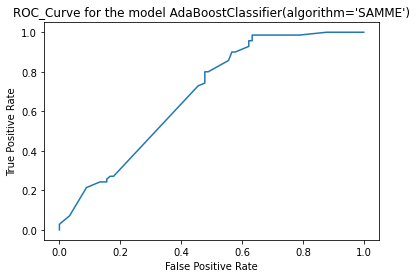

ROC AUC SCORE is- 0.661111111111111


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model AdaBoostClassifier(algorithm='SAMME') is 0.535175879396985


At the K-Fold 3 the CV score of model AdaBoostClassifier(algorithm='SAMME') is 0.5968080578805504


At the K-Fold 4 the CV score of model AdaBoostClassifier(algorithm='SAMME') is 0.6507537688442211


At the K-Fold 5 the CV score of model AdaBoostClassifier(algorithm='SAMME') is 0.6547091194968553


At the K-Fold 6 the CV score of model AdaBoostClassifier(algorithm='SAMME') is 0.664578111946533


At the K-Fold 7 the CV score of model AdaBoostClassifier(algorithm='SAMME') is 0.6909308669904851




In [104]:
model(ad,x,y)

For model GradientBoostingClassifier(criterion='squared_error', loss='exponential',
                           max_features='sqrt')
Training_Accuracy_Score= 0.8380503144654088
Testing_Accuracy_Score= 0.6875

 Classification Report-
               precision    recall  f1-score   support

           0       0.81      0.58      0.68        90
           1       0.60      0.83      0.70        70

    accuracy                           0.69       160
   macro avg       0.71      0.70      0.69       160
weighted avg       0.72      0.69      0.69       160


 Confusion Metrix-
 [[52 38]
 [12 58]]


AUC_ROC CURVE


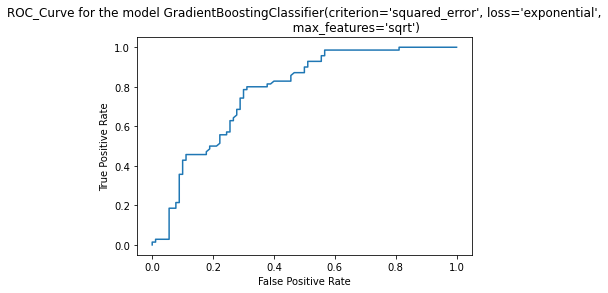

ROC AUC SCORE is- 0.7031746031746031


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model GradientBoostingClassifier(criterion='squared_error', loss='exponential',
                           max_features='sqrt') is 0.5653266331658291


At the K-Fold 3 the CV score of model GradientBoostingClassifier(criterion='squared_error', loss='exponential',
                           max_features='sqrt') is 0.5980470043032109


At the K-Fold 4 the CV score of model GradientBoostingClassifier(criterion='squared_error', loss='exponential',
                           max_features='sqrt') is 0.6494974874371859


At the K-Fold 5 the CV score of model GradientBoostingClassifier(criterion='squared_error', loss='exponential',
                           max_features='sqrt') is 0.6509040880503145


At the K-Fold 6 the CV score of model GradientBoostingClassifier(criterion='squared_error', loss='exponential',
                           max_features='sqrt') is 0.644565960355434


At th

In [105]:
model(grd,x,y)

DecisionTreeClassifier model seems perfect as compare to other models as the training accuracy is almost 100% while testing accuracy and CV score is 76% which is good enough.Also the CV score and testing accuracy are same it's also indicates that our model is performing excellent by each method either random_state or K-Fold method.The F1-score is 76% too it means that error are on lower side and ROC_AUC_SCORE is 0.76,which is greater than the threshold value of 0.6, which indicates that the machine probability is good while predicting 1 as 1 and 0 as 0.

# Saving the Best Model

In [106]:
import joblib

In [107]:
file='loan_status.obj'
joblib.dump(dtc,file)

['loan_status.obj']

# Loading the Model

In [108]:
a=joblib.load('loan_status.obj')
a

DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       splitter='random')

In [109]:
#making prediction
pred=a.predict(x_test)
pred

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1])

# Plotting ROC_AUC_CURVE


The ROC AUC Score is= 0.9505012531328321


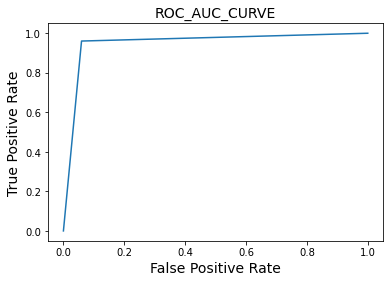

In [110]:
prob=a.predict_proba(x_test)[:,1]
FPR,TPR,THRESHOLD=roc_curve(y_test,prob)
plt.plot(FPR,TPR)
plt.xlabel('False Positive Rate',fontsize=14)
plt.ylabel('True Positive Rate',fontsize=14)
plt.title('ROC_AUC_CURVE',fontsize=14)
print(f'\nThe ROC AUC Score is= {roc_auc_score(y_test,pred)}')

# Conclusion

In [111]:
conclusion=pd.DataFrame(data=([pred,y_test]),index=['Predicted Loan_Status','Original Loan_Status'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,150,151,152,153,154,155,156,157,158,159
Predicted Loan_Status,0,1,1,0,0,0,0,1,0,0,...,0,0,1,0,1,0,1,0,0,1
Original Loan_Status,0,1,1,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
